In [23]:
from wgangp.db_utils import *
from acf_utils import *
from utility import *

In [7]:
db_name = "lagrangian"
wgan_type = "wgangp2048"
run = 10
number = 10000

try: os.mkdir(f'plots/'+wgan_type+'_{run}')
except FileExistsError: print("Already there")

In [ ]:
path = f'/scratch/scarpolini/'+db_name+'/'+wgan_type+'/runs/{run}/{number}_gen.h5'
gen = load_model(path)
trajs = gen.predict(np.random.normal(0, 1, size=(50000, 100)))
os.mkdir(f'/storage/scarpolini/databases/'+db_name+'/'+wgan_type+'/runs/{run}')
np.save(f'/storage/scarpolini/databases/'+db_name+'/'+wgan_type+'/runs/{run}/gen_trajs_{number}', trajs)
del trajs

In [243]:
#path = f'/storage/scarpolini/databases/lagrangian/wgangp2048/runs/{run}/gen_trajs_{number}.npy'
path = f'/scratch/scarpolini/lagrangian/'+wgan_type+f'/runs/{run}/gen_trajs_{number}.npy'
gen = np.load(path)
print('shape: ',gen.shape)

M = gen.max()
m = gen.min()
print('massimo, minimo: ',M,m)

#db = np.load('/scratch/scarpolini/databases/velocities.npy')[:,:,0]
#M = db.max() 
M = 10.273698864467972
#m = db.min()
m = -9.970374739869616
semidisp = (M-m)/2.
media = (M+m)/2.
gen = gen*semidisp + media
print('veri',M,m)
M = gen.max()
m = gen.min()
print('generati',M,m)

shape:  (50000, 2048, 1)
massimo, minimo:  0.80816334 -0.85727197
veri 10.273698864467972 -9.970374739869616
generati 8.331921 -8.525677


# PDFs

1.0017092626771908
1.000317469813493
1.0026846043833015
1.0060994957037035


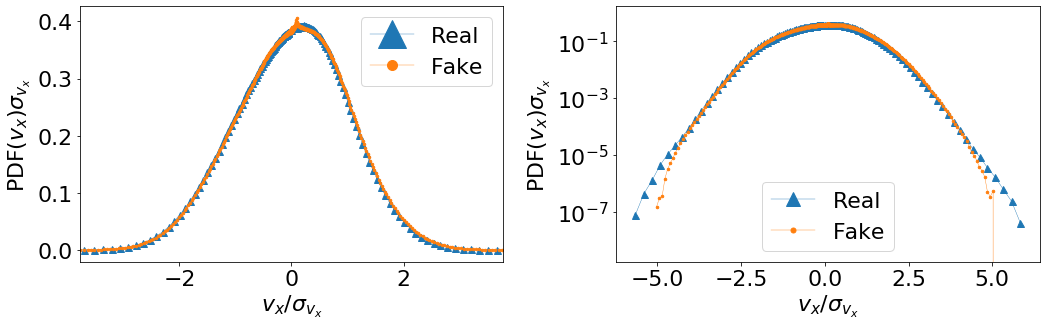

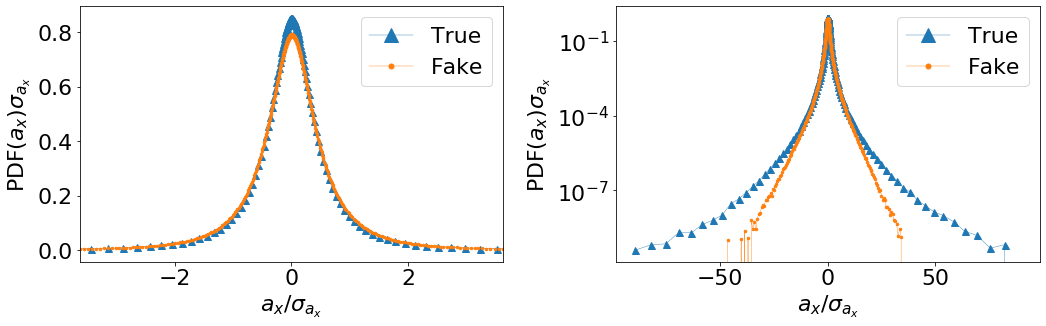

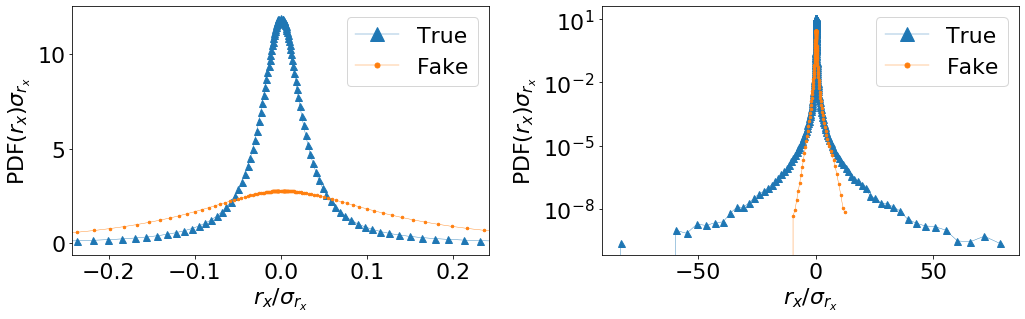

In [148]:
op_gen = {'marker':'.','lw':0.4,'ms':5}
op_real = {'marker':'^','lw':0.4,'ms':7}

fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/pdf_vx')
kurtosis_real = kurtosis(bin_edges, hist)
# normalizzate
vel_std = 1.7192559430218903
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Real', **op_real)
ax2n.plot(bin_edges, hist, label='Real', **op_real)

bins=create_log_bins(gen.min(),gen.max(),800,1e-2)
hist, bin_edges = np.histogram(gen.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]

# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', **op_gen)
ax2n.plot(bin_edges, hist, label='Fake', **op_gen)

ax1n.set_xlabel('$v_x / \\sigma_{v_x}$')
ax1n.set_ylabel('PDF$(v_x) \\sigma_{v_x}$')
ax1n.set_xlim([-6.5/vel_std,6.5/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / \\sigma_{v_x}$')
ax2n.set_yscale('log')
ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('PDF$(v_x) \\sigma_{v_x}$')
ax2n.legend(markerscale=2)

fign.tight_layout()
#fign.savefig(f'lagr_gan_d0_run51_w_extremes', fmt='png', dpi=60)



gm = np.gradient(gen,axis=1)

fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_ax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
# normalizzate
acc_std = 0.0412815564714219
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', **op_real)
ax2n.plot(bin_edges, hist, label='True', **op_real)

bins=create_log_bins(gm.min(),gm.max(),800,5.e-4)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', **op_gen)
ax2n.plot(bin_edges, hist, label='Fake', **op_gen)

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / \\sigma_{a_x}$')
ax1n.set_ylabel('PDF$(a_x) \\sigma_{a_x}$')
ax1n.set_xlim([-0.15/acc_std,0.15/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / \\sigma_{a_x}$')
ax2n.set_ylabel('PDF$(a_x) \\sigma_{a_x}$')
ax2n.set_yscale('log')

fign.tight_layout()
#fign.savefig(f'lagr_gan_d1_run51_w_extremes', fmt='png', dpi=60)



gmm = np.gradient(gm,axis=1)

fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_aax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
# normalizzate
aacc_std = 0.007416499876515975
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True',**op_real)
ax2n.plot(bin_edges, hist, label='True',**op_real)

bins=create_log_bins(gmm.min(),gmm.max(),200,1e-4)
hist, bin_edges = np.histogram(gmm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake',**op_gen)
ax2n.plot(bin_edges, hist, label='Fake',**op_gen)

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$r_x / \\sigma_{r_x}$')
ax1n.set_ylabel('PDF$(r_x) \\sigma_{r_x}$')
ax1n.set_xlim([-0.01/acc_std,0.01/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$r_x / \\sigma_{r_x}$')
ax2n.set_ylabel('PDF$(r_x) \\sigma_{r_x}$')
ax2n.set_yscale('log')

fign.tight_layout()
#fign.savefig(f'lagr_gan_d2_run51_w_extremes', fmt='png', dpi=60)

In [255]:
read_path = (f'/scratch/scarpolini/'+db_name+'/'+wgan_type+
             f'/runs/{run}/gen_trajs_{number}.npy')

In [256]:
read_path

'/scratch/scarpolini/lagrangian/wgangp2048/runs/5/gen_trajs_8000.npy'

Already there
shape:  (50000, 2048, 1)
massimo, minimo:  0.9987762570381165 -0.9964580535888672
veri 10.273698864467972 -9.970374739869616
generati 10.26131209317139 -9.93452302794482
Velocity done, Acceleration done, S. derivative done. Saving.


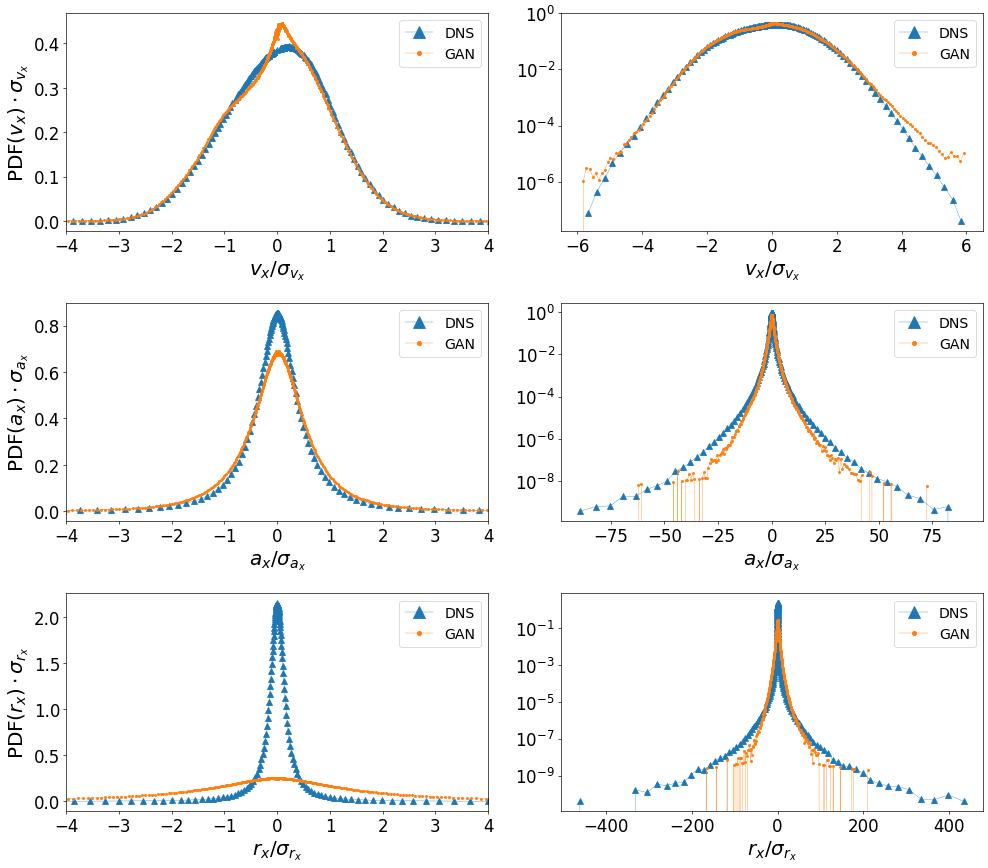

In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

DB_NAME = "lagrangian"
WGAN_TYPE = "wgangp2048"
run = 10
number = 10000
read_path = (f'/scratch/scarpolini/'+DB_NAME+'/'+WGAN_TYPE+
             f'/runs/{run}/gen_trajs_{number}.npy')
read_real = True
read_path = (f'/storage/scarpolini/databases/'+DB_NAME+'/'+WGAN_TYPE+
             f'/runs/{run}/gen_trajs_{number}.npy')

if read_real:
    read_path_r = ['data/pdf_vx.pickle', 'data/pdf_ax.pickle', #VAR
                    'data/pdf_aax.pickle']

write_path = f'plots/'+WGAN_TYPE+f'_{run}/pdfs_{number}'
gen = np.load(read_path)

try:
    os.mkdir(f'plots/'+WGAN_TYPE+f'_{run}')
except FileExistsError:
    print("Already there")

print('shape: ',gen.shape)
M = gen.max()
m = gen.min()
print('massimo, minimo: ',M,m)
#M = db.max() 
M = 10.273698864467972 #VAR
#m = db.min()
m = -9.970374739869616 #VAR
semidisp = (M-m)/2.
media = (M+m)/2.
gen = gen*semidisp + media
print('veri',M,m)
M = gen.max()
m = gen.min()
print('generati',M,m)

def create_log_bins(xmin,xmax,nbin,eps):
    import numpy as np
    if xmin*xmax<0.:
        estremo = np.max([xmax,-xmin])
        bins1 = np.logspace(np.log10(eps),np.log10(estremo), nbin//2)
        bins = np.r_[-bins1[::-1],[0.],bins1]
        return bins
    elif xmax>0. and xmin>0.:
        bins = np.logspace(np.log10(xmin),np.log10(xmax), nbin)
        return bins
    else:
        print("problem")
        return 0

def make_hist(samples, bins='lin', std=False, out=False):
    
    std_done = False
    
    if type(samples)==type('str') and samples[-7:]==".pickle" :
        
        import pickle
        with open(samples, 'rb') as f:
            (hist, bins) = pickle.load(f)
                
        if std :
            std_done = True
            std = 0.
            mean = 0.
            for i in range(len(hist)):
                mean += (bins[i+1] - bins[i])*hist[i]*(bins[i+1] + bins[i])/2
            for i in range(len(hist)):
                std += (bins[i+1] - bins[i])*hist[i]*((bins[i+1] + bins[i])/2 - mean)**2.
            std = np.sqrt(std)
            hist = hist * std
            bins = (bins - mean) / std
        
    elif type(samples) == type(np.ndarray([])) :
        
        hist, bins = np.histogram(samples.flatten(), bins=bins, density=True)
            
    else: raise NameError("'samples' type not recognized")
        
    if std and not std_done :
        mean = samples.mean()
        std = samples.std()
        hist = hist * std
        bins = (bins - mean) / std
        
    assert len(hist) == len(bins)-1
    
    for i in range(len(hist)):
        bins[i] = (bins[i]+bins[i+1])/2.
    bins = bins[:-1]
    
    binhist = np.zeros(shape=(2,len(hist)))
    binhist[0,:] = bins
    binhist[1,:] = hist
    
    if out : return binhist, mean, std
    
    return binhist


op_gen = {'marker':'.','lw':0.4,'ms':5,'label':'GAN'}
op_real = {'marker':'^','lw':0.4,'ms':7,'label':'DNS'}
op_leg = {'ncol':1}

plt.rcParams['font.size'] = 24
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 17
#plt.rcParams['figure.titlesize'] = 22
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.figsize'] = (17, 15)
#plt.rcParams['lines.linewidth'] = 0.5
#plt.rcParams['lines.markersize'] = 13
plt.rcParams['legend.markerscale'] = 2
#plt.rcParams['lines.marker'] = '.'

fig, ax = plt.subplots(3,2, )
ax[0,1].set_yscale('log')
ax[1,1].set_yscale('log')
ax[2,1].set_yscale('log')
ax[0,0].set_xlabel('$v_x / \\sigma_{v_x}$')
ax[0,1].set_xlabel('$v_x / \\sigma_{v_x}$')
ax[1,0].set_xlabel('$a_x / \\sigma_{a_x}$')
ax[1,1].set_xlabel('$a_x / \\sigma_{a_x}$')
ax[2,0].set_xlabel('$r_x / \\sigma_{r_x}$')
ax[2,1].set_xlabel('$r_x / \\sigma_{r_x}$')
ax[0,0].set_ylabel('PDF$(v_x)\\cdot\\sigma_{v_x}$')
ax[1,0].set_ylabel('PDF$(a_x)\\cdot\\sigma_{a_x}$')
ax[2,0].set_ylabel('PDF$(r_x)\\cdot\\sigma_{r_x}$')
ax[0,0].set_xlim([-4,4])
ax[1,0].set_xlim([-4,4])
ax[2,0].set_xlim([-4,4])

# VELOCITY

#real
if read_real:
    vr, _, vstd = make_hist(read_path_r[0], std=True, out=True)
else:
    raise NameError('COMPUTE REAL TODO')
ax[0,0].plot(*(vr), **op_real)
ax[0,1].plot(*(vr), **op_real)

#gen
bins=create_log_bins(gen.min(),gen.max(),800,1e-2) #VAR
vg = make_hist(gen, bins=bins)
vg[1,:] = vg[1,:] * vstd
vg[0,:] = vg[0,:] / vstd
ax[0,0].plot(*(vg), **op_gen)
ax[0,1].plot(*(vg), **op_gen)
print("Velocity done,",end=" ")

# ACCELERATION
gm = np.gradient(gen,axis=1)

#real
if read_real: 
    ar, _, astd = make_hist(read_path_r[1], std=True, out=True)
else:
    raise NameError('COMPUTE REAL TODO')
ax[1,0].plot(*(ar), **op_real)
ax[1,1].plot(*(ar), **op_real)

#gen
bins=create_log_bins(gm.min(),gm.max(),800,5.e-4) #VAR
ag = make_hist(gm, bins=bins)
ag[1,:] = ag[1,:] * astd
ag[0,:] = ag[0,:] / astd
ax[1,0].plot(*(ag), **op_gen)
ax[1,1].plot(*(ag), **op_gen)
print("Acceleration done,",end=" ")

# SECOND DERIVATIVE
gg = np.gradient(gm,axis=1)

#real
if read_real: 
    rr, _, rstd = make_hist(read_path_r[2], std=True, out=True)
else:
    raise NameError('COMPUTE REAL TODO')
ax[2,0].plot(*(rr), **op_real)
ax[2,1].plot(*(rr), **op_real)

#gen
bins=create_log_bins(gg.min(),gg.max(),800,1.e-4) #VAR
rg = make_hist(gg, bins=bins)
rg[1,:] = rg[1,:] * rstd
rg[0,:] = rg[0,:] / rstd
ax[2,0].plot(*(rg), **op_gen)
ax[2,1].plot(*(rg), **op_gen)
print("S. derivative done. Saving.")

ax[0,0].legend(**op_leg)
ax[0,1].legend(**op_leg)
ax[1,0].legend(**op_leg)
ax[1,1].legend(**op_leg)
ax[2,0].legend(**op_leg)
ax[2,1].legend(**op_leg)

fig.tight_layout()
fig.savefig(write_path, fmt='png', dpi=60)

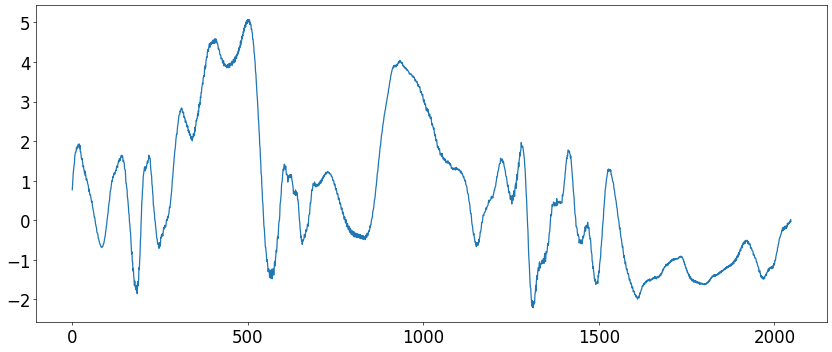

In [21]:
plt.figure(figsize=(17,7))
plt.plot(gen[np.random.randint(0,gen.shape[0])])

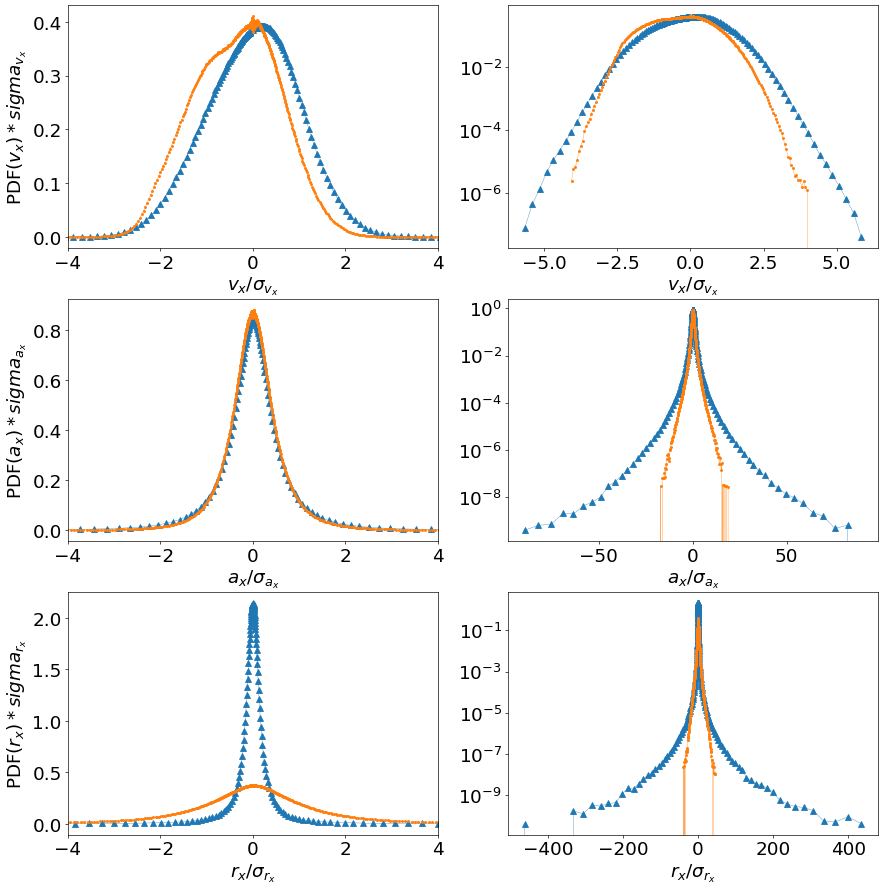

In [201]:
# ACCELERATION
gm = np.gradient(gen,axis=1)
acc_std = 0.0412815564714219 #VAR

#real
hist, bin_edges = load_pdf('data/pdf_ax')
kurtosis_real = kurtosis(bin_edges, hist)
hist *= acc_std
bin_edges /= acc_std
ax[1,0].plot(bin_edges, hist, label='Real', **op_real)
ax[1,1].plot(bin_edges, hist, label='Real', **op_real)

#gen
bins=create_log_bins(gm.min(),gm.max(),800,5.e-4) #VAR
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
hist *= acc_std
bin_edges /= acc_std
ax[1,0].plot(bin_edges, hist, label='Fake', **op_gen)
ax[1,1].plot(bin_edges, hist, label='Fake', **op_gen)

# SECOND DERIVATIVE
gg = np.gradient(gm,axis=1)
r_std = 0.007416499876515975 #VAR

#real
hist, bin_edges = load_pdf('data/pdf_aax')
kurtosis_real = kurtosis(bin_edges, hist)
hist *= r_std
bin_edges /= r_std
ax[2,0].plot(bin_edges, hist, label='Real', **op_real)
ax[2,1].plot(bin_edges, hist, label='Real', **op_real)

#gen
bins=create_log_bins(gg.min(),gg.max(),800,1.e-4) #VAR
hist, bin_edges = np.histogram(gg.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
hist *= r_std
bin_edges /= r_std
ax[2,0].plot(bin_edges, hist, label='Fake', **op_gen)
ax[2,1].plot(bin_edges, hist, label='Fake', **op_gen)

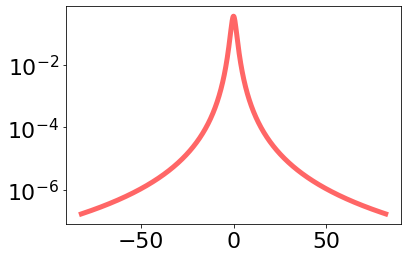

In [156]:
from scipy.stats import t

df = 2.74
x = np.linspace(t.ppf(0.000005, df),
                t.ppf(0.999995, df), 1000)
plt.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')
plt.yscale("log")

## Calcolo funzioni di struttura Lagrangiane di ordine p: $$ S_p^L(\tau) = <(v_x(t+\tau)-(v_x(t))^p> $$

## Kurtosis o Flatness: $$ K^L(\tau) = \frac{S_4^L(\tau)}{[S_2^L(\tau)]^2} $$

In [4]:
npart = 50000
sfr = np.load("data/real/struct_function_327680_part_2048.npy")
sfg = np.loadtxt("data/"+wgan_type+f"/struct_function_{npart}_part_gen_{run}_{number}.npy")

op_gen = {'marker':'.','lw':0.4,'ms':25,'markeredgewidth':1 , 'markeredgecolor':"black"}
op_real = {'marker':'^','lw':0.4,'ms':14}
plt.figure(figsize=(17,7), dpi=60)

plt.subplot(121)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("$\\tau$")
plt.ylabel('$S_n(\\tau)$')
for ii in range(1,4):
    plt.plot(sfr[:,0],sfr[:,ii],label="(R) n= "+str((ii)*2), color='C'+str(ii-1),**op_real)
for ii in range(1,4):
    plt.plot(sfg[:,0],sfg[:,ii],label="(G) n= "+str((ii)*2), color='C'+str(ii-1),**op_gen)

plt.legend(ncol=2, markerscale=2)

plt.subplot(122)
plt.xscale('log')
plt.yticks([3,6,9,12,15,18])
plt.xlabel("$\\tau$")
plt.yscale('log')
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)

plt.plot(sfr[:,0],sfr[:,2]/sfr[:,1]**2., label="(R) $F_4$", color='C1',**op_real)
plt.plot(sfr[:,0],sfr[:,3]/sfr[:,1]**3., label="(R) $F_6$", color='C2',**op_real)

plt.plot(sfg[:,0],sfg[:,2]/sfg[:,1]**2., label="(G) $F_4$", color='C0',**op_gen)
plt.plot(sfg[:,0],sfg[:,3]/sfg[:,1]**3., label="(G) $F_6$", color='C3',**op_gen)

plt.legend(ncol=2, markerscale=2)
plt.tight_layout()
#plt.savefig(f"plots/wgangp2048_{run}/struct_func_comp_gen_{run}_{number}",fmt="png",dpi=60)
#plt.savefig(f"lagr_gan_sf_flatness_we_run",fmt="png",dpi=60)

# DERIVATE LOGARITMICHE

dlr = np.zeros(shape=sfr.shape) #derivata logaritmica reale
dlg = np.zeros(shape=sfg.shape) #derivata logaritmica gen

dlr[:,0] = struct_real[:,0]
dlr[:,1:] =  np.gradient( np.log(sfr[:,1:]), np.log(sfr[:,0]), axis=0 )
dlg[:,0] = struct_gen[:,0]
dlg[:,1:] =  np.gradient( np.log(sfg[:,1:]), np.log(sfg[:,0]), axis=0  )

plt.figure(figsize=(17,7), dpi=60)

plt.subplot(1,2,1)
plt.xscale('log')
plt.ylim([-0.3,7])
plt.xlabel("$\\tau$")
plt.ylabel("$\\xi_n(\\tau)$")
for ii in range(1,4):
    #real
    plt.plot(*(dlr[:,[0,ii]].T), label="(R) n= "+str((ii)*2), color='C'+str(ii-1),**op_real)
for ii in range(1,4):
    #gen
    plt.plot(*(dlg[:,[0,ii]].T), label="(G) n= "+str((ii)*2), color='C'+str(ii-1),**op_gen)

plt.legend(markerscale=1.5,ncol=2)


plt.subplot(1,2,2)
plt.ylim([1,4])
plt.xscale('log')
plt.xlabel("$\\tau$")
plt.ylabel("$\\xi_n(\\tau)/ \\xi_2(\\tau)$")
#ref
plt.plot(dlr[:,0], (lambda x: [4/2]*len(x))(dl_struct_real[:,0]), ls='--', color="C0")
plt.plot(dlr[:,0], (lambda x: [6/2]*len(x))(dl_struct_real[:,0]), ls='--', color="C1")

for ii in range(2):
    plt.plot(dlr[:,0],dlr[:,ii+2]/dlr[:,1],label="(R) n="+str((ii+2)*2), color='C'+str(ii),**op_real)
for ii in range(2):
    plt.plot(dlg[:,0],dlg[:,ii+2]/dlg[:,1],label="(G) n="+str((ii+2)*2), color='C'+str(ii),**op_gen)

plt.legend(ncol=2,markerscale=1.5)
plt.tight_layout()
#plt.savefig(f"plots/'+wgan_type+f'_{run}/struct_func_comp_gen_{run}_{number}",fmt="png",dpi=60)
#plt.savefig(f"lagr_gan_sf_locslope_we_run",fmt="png",dpi=60)

NameError: name 'wgan_type' is not defined

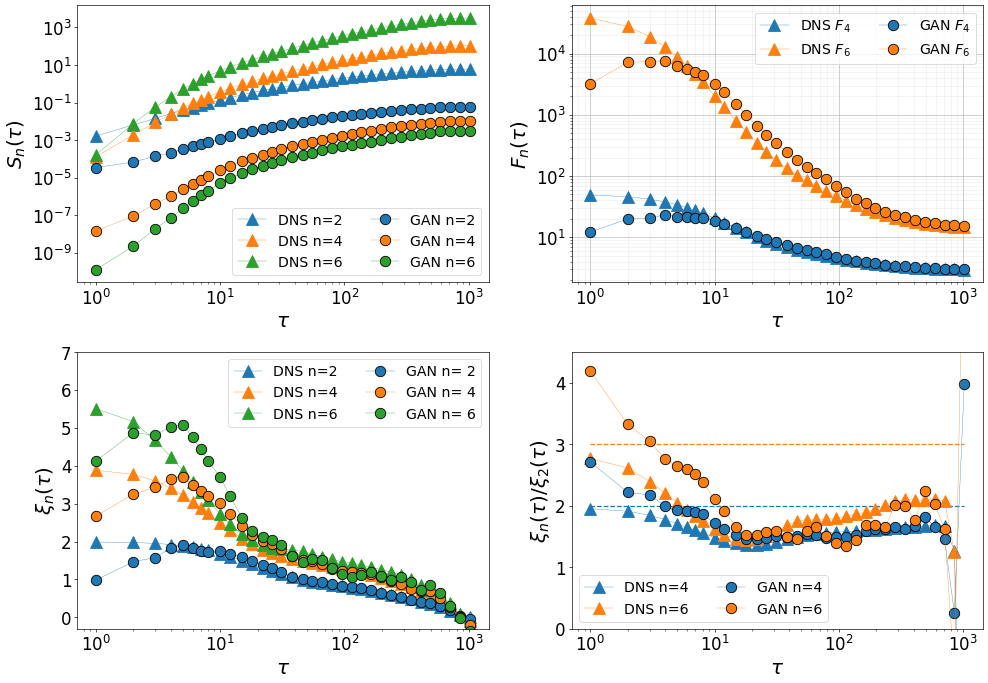

In [12]:
import numpy as np
import matplotlib.pyplot as plt

npart = 50000
run = 10
number = 10000
WGAN_TYPE = 'wgangp2048'

sfr = np.load("data/real/struct_function_327680_part_2048.npy")
sfg = np.loadtxt("data/"+WGAN_TYPE+f"/struct_function_{npart}_part_gen_{run}_{number}.npy")

# DERIVATE LOGARITMICHE
dlr = np.zeros(shape=sfr.shape) #derivata logaritmica reale
dlg = np.zeros(shape=sfg.shape) #derivata logaritmica gen
dlr[:,0] = sfr[:,0]
dlr[:,1:] =  np.gradient( np.log(sfr[:,1:]), np.log(sfr[:,0]), axis=0 )
dlg[:,0] = sfg[:,0]
dlg[:,1:] =  np.gradient( np.log(sfg[:,1:]), np.log(sfg[:,0]), axis=0  )


op_gen = {'marker':'.','lw':0.4,'ms':25,'markeredgewidth':1 ,
          'markeredgecolor':"black"}
op_real = {'marker':'^','lw':0.4,'ms':14}
op_leg = {'markerscale':1, 'ncol':2}

plt.rcParams['font.size'] = 24
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.figsize'] = (17, 12)
plt.rcParams['legend.markerscale'] = 2

fig, ax = plt.subplots(2,2)
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].set_xlabel("$\\tau$")
ax[0,0].set_ylabel('$S_n(\\tau)$')
ax[0,1].set_xscale('log')
ax[0,1].set_yticks([3,6,9,12,15,18])
ax[0,1].set_xlabel("$\\tau$")
ax[0,1].set_ylabel("$F_n(\\tau)$")
ax[0,1].set_yscale('log')
ax[0,1].grid(which='minor', alpha=0.2)
ax[0,1].grid(which='major', alpha=0.9)
ax[1,0].set_xscale('log')
ax[1,0].set_ylim([-0.3,7])
ax[1,0].set_xlabel("$\\tau$")
ax[1,0].set_ylabel("$\\xi_n(\\tau)$")
ax[1,1].set_ylim([0.,4.5])
ax[1,1].set_xscale('log')
ax[1,1].set_xlabel("$\\tau$")
ax[1,1].set_ylabel("$\\xi_n(\\tau)/ \\xi_2(\\tau)$")

#sf
for ii in range(1,4):
    ax[0,0].plot(sfr[:,0],sfr[:,ii],label="DNS n="+str((ii)*2),
                 color='C'+str(ii-1),**op_real)
for ii in range(1,4):
    ax[0,0].plot(sfg[:,0],sfg[:,ii],label="GAN n="+str((ii)*2),
                 color='C'+str(ii-1),**op_gen)

    #flatnesses
ax[0,1].plot(sfr[:,0],sfr[:,2]/sfr[:,1]**2., label="DNS $F_4$",
             color='C0',**op_real)
ax[0,1].plot(sfr[:,0],sfr[:,3]/sfr[:,1]**3., label="DNS $F_6$",
             color='C1',**op_real)
ax[0,1].plot(sfg[:,0],sfg[:,2]/sfg[:,1]**2., label="GAN $F_4$",
             color='C0',**op_gen)
ax[0,1].plot(sfg[:,0],sfg[:,3]/sfg[:,1]**3., label="GAN $F_6$",
             color='C1',**op_gen)

# locslopes
for ii in range(1,4):
    ax[1,0].plot(*(dlr[:,[0,ii]].T), label="DNS n="+str((ii)*2),
                 color='C'+str(ii-1),**op_real)
for ii in range(1,4):
    ax[1,0].plot(*(dlg[:,[0,ii]].T), label="GAN n= "+str((ii)*2),
                 color='C'+str(ii-1),**op_gen)

#locslopes ess
ax[1,1].plot(dlr[:,0], (lambda x: [4/2]*len(x))(dlr[:,0]),ls='--',
             color="C0")
ax[1,1].plot(dlr[:,0], (lambda x: [6/2]*len(x))(dlr[:,0]),ls='--',
             color="C1")
for ii in range(2):
    ax[1,1].plot(dlr[:,0],dlr[:,ii+2]/dlr[:,1],label="DNS n="+str((ii+2)*2),
                 color='C'+str(ii),**op_real)
for ii in range(2):
    ax[1,1].plot(dlg[:,0],dlg[:,ii+2]/dlg[:,1],label="GAN n="+str((ii+2)*2),
                 color='C'+str(ii),**op_gen)

ax[0,0].legend(**op_leg)
ax[0,1].legend(**op_leg)
ax[1,0].legend(**op_leg)
ax[1,1].legend(**op_leg)

fig.tight_layout()

In [14]:
a = np.round(np.logspace(np.log2(2),np.log2(1000),23,base=2)).astype('int')
for ii in range(len(a)):
    print(a[ii],end=", ")

a = list(dict.fromkeys([int(1.2**n) for n in range(0,39)]))
len(a)

for ii in range(len(a)):
    print(a[ii],end=", ")

In [14]:
a = np.round(np.logspace(np.log2(2),np.log2(1000),23,base=2)).astype('int')
for ii in range(len(a)):
    print(a[ii],end=", ")

a = list(dict.fromkeys([int(1.2**n) for n in range(0,39)]))
len(a)

for ii in range(len(a)):
    print(a[ii],end=", ")

In [14]:
from functools import partial

In [ ]:
def noise_gen(samples):
    return partial(np.random.standard_t, 4, size)

0.9999994999999986
0.9999994999999997


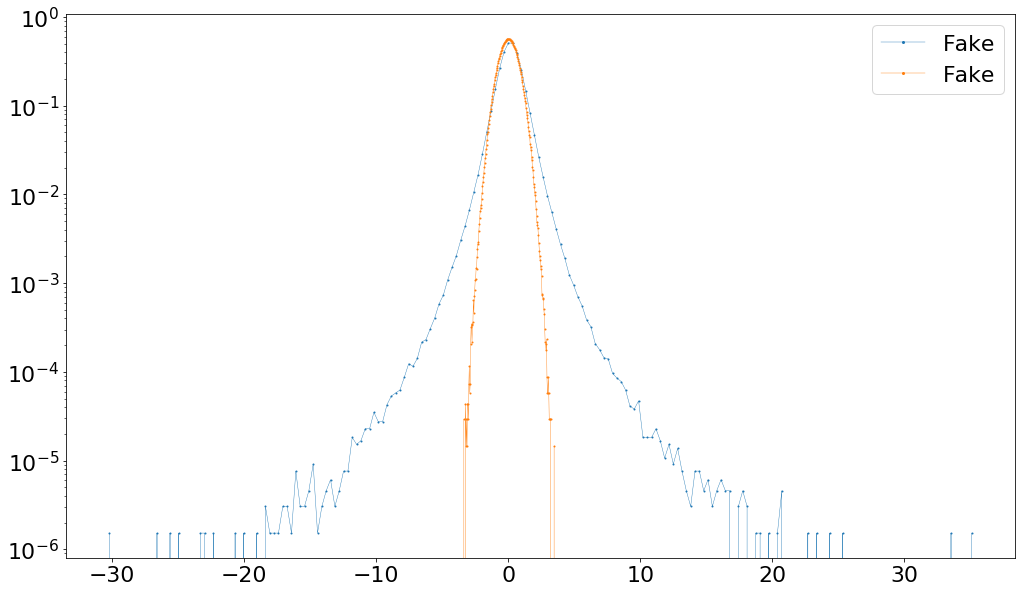

In [175]:
op_gen = {'marker':'.','lw':0.4,'ms':2}

x = np.random.standard_t(4, size=(2000000))
y = np.random.normal(0,1, size=(2000000))

plt.figure(figsize=(17,10))
hist, bin_edges = np.histogram(x, bins=200, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
# normalizzate
std = x.std()
hist = hist * std
bin_edges = bin_edges / std
plt.plot(bin_edges, hist, label='Fake', **op_gen)

hist, bin_edges = np.histogram(y, bins=200, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
# normalizzate
std = x.std()
hist = hist * std
bin_edges = bin_edges / std
plt.plot(bin_edges, hist, label='Fake', **op_gen)


plt.legend(markerscale=2)
plt.yscale('log')

fign.tight_layout()
#fign.savefig(f'lagr_gan_d1_run51_w_extremes', fmt='png', dpi=60)


# ACF_x

In [72]:
plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['figure.dpi'] = 60
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 13
plt.rcParams['legend.markerscale'] = 2
plt.rcParams['lines.marker'] = '.'

In [39]:
mean[204]

0.36804587449505044

# since acf$(204)=e^{-1}=0.368$, the correlation time of the turbulent dataset is $\tau^*= 204$

calcolo nuove acf


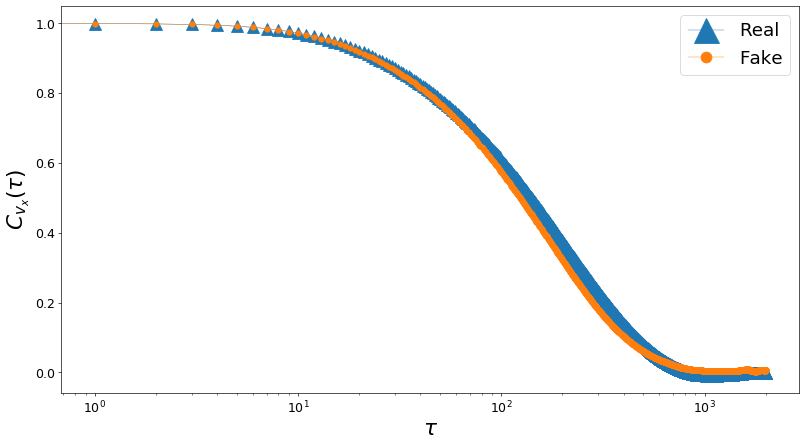

In [41]:
mean = np.load('../databases/velocities_acf_mean_and_std.npy')[0,:,0]
plt.plot(mean, label='Real', marker="^", ms=15)
try: 
    #acfg = np.load(f'data/acf_x_gen_{run}_{number}.npy')
    acfg = np.load(f'data/acf_x_gen_{run}_{45645645645}.npy')
    print('acf found')
except:
    print("calcolo nuove acf")
    #acfg = acf_x(gen,npart=20000)
    dbnn = np.expand_dims(np.load('../databases/gaussian_process2_smooth.npy'),-1)
    acfg = acf_x(dbnn,npart=20000)
    #np.save(f'data/acf_x_gen_{run}_{number}',acfg)

plt.plot(acfg, label='Fake')
#plt.title('Auto-cor. $v_x$')
plt.xlabel('$\\tau$')
plt.legend()
plt.xscale('log')
plt.ylabel('$C_{v_x}(\\tau)$')
plt.tight_layout()
#plt.savefig(f'plots/wgangp_{run}/gan_test_acfx_{run}_{number}.png', fmt='png', dpi=60)
#plt.savefig('lagr_gan_acf_run51', fmt='png', dpi=60)
plt.show()

# CALCOLO ACF SECONDO LA SUBROUTINE IN FORTRAN

In [4]:
db = np.load('../databases/velocities.npy')[:,:,0:1]

In [111]:
NN = 1000
dbb = db[:,:,0] - db.mean(axis=1)
acfr = compute_acf(dbb,npart=NN)
#acfg = compute_acf(gen,npart=NN)

Taken partial dataset, 1000 trajectories
2.3697986602783203


In [78]:
idx = np.random.randint(0,db.shape[0],10000)
acfr = np.array([correlate(x) for x in db[idx,:,0]])

Taken whole dataset, 1 trajectories
0.0074007511138916016


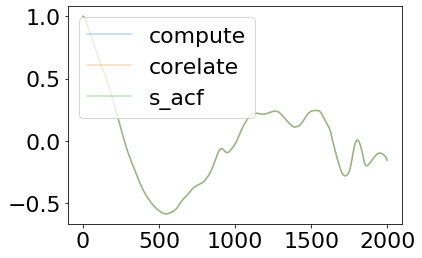

In [109]:
ii = np.random.randint(0,50000)
traj = dbb[ii:ii+1,:]
plt.plot(compute_acf(traj), label="compute",alpha=0.3)
plt.plot(correlate(traj.squeeze()), label="corelate",alpha=0.3)
plt.plot(s_acf(traj.squeeze()), label="s_acf",alpha=0.3)
plt.legend()
plt.show()

In [112]:
acfr_m = acfr.mean(axis=0)
acfr_std = acfr.std(axis=0)# / np.sqrt(NN)
#acfg_m = acfg.mean(axis=0)
#acfg_std = acfg.std(axis=0) / np.sqrt(NN)

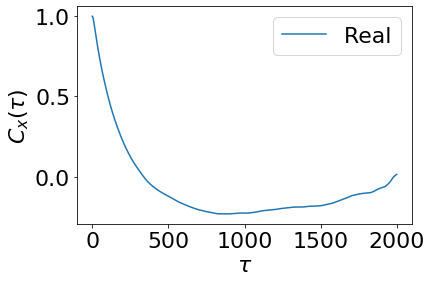

In [113]:
plt.plot(acfr_m, label='Real')
#plt.plot(acfg_m, label='fake')
#l, caps, c = plt.errorbar(np.arange(0,2000), acfr_m, acfr_std, lw=0, marker='^', ms=4, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Real')
#for cap in caps:
#    cap.set_marker("_")
#    
#l, caps, c = plt.errorbar(np.arange(0,2000), acfg_m, acfg_std, lw=0, marker='^', ms=4, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Fake')
#for cap in caps:
#    cap.set_marker("_")

#plt.plot(acfg, label='Fake')
#plt.xlim([1,2000])
#plt.xscale('log')
plt.ylabel('$ C_x(\\tau)$')
plt.xlabel('$\\tau$')
plt.legend()

#plt.subplot(1,2,2)
#plt.plot(bins, hist, label='Real')
#plt.plot(binsg, histg, label='Fake')
##plt.xlim([1,2000])
##plt.xscale('log')
#plt.ylabel('PDF($\\tau| C_x(\\tau)=0.5$)')
#plt.xlabel('$\\tau$')
#plt.legend()

#plt.savefig(f'lorenz_gan_acf_et_run{run}', fmt='png', dpi=60)
plt.show()

# ACF$_x$ accelerazione

calcolo nuove acf


<Figure size 576x432 with 0 Axes>

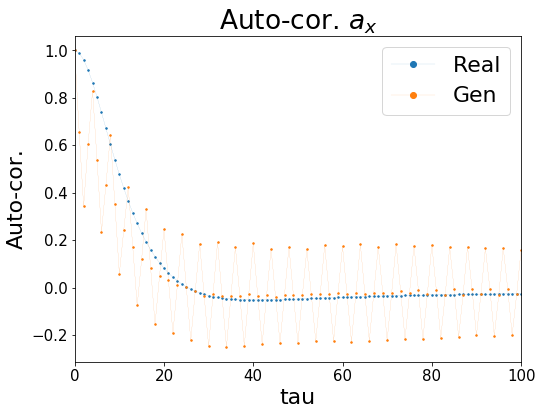

In [45]:
plt.figure(figsize=(8,6))
mean = np.load('../databases/accelerations_acf_mean_and_std.npy')[0,:,0]

plt.figure(figsize=(8,6))
plt.plot(mean, label='Real')
try: 
    acfg = np.load(f'data/acf_x_gen_{run}_{number}_acc.npy')
    print('acf found')
except:
    print("calcolo nuove acf")
    acfg = acf_x(gm,npart=50000)
    np.save(f'data/acf_x_gen_{run}_{number}_acc',acfg)

plt.plot(acfg, label='Gen')
plt.title('Auto-cor. $a_x$')
plt.xlim([0,100])
plt.xlabel('tau')
plt.legend()
plt.ylabel('Auto-cor.')
plt.savefig(f'plots/wgangp_{run}/gan_test_acfx_acc_{run}_{number}.png', fmt='png', dpi=60)
plt.show()

# Exit time

In [16]:
paths = [f'data/acf_x_gen_{run}_{number}.npy']
try: exit_times = np.load(f'data/exit_time_x_gen_{run}_{number}.npy')
except:
    exit_times = gen_exit_time(run, number, 0.5)
    np.save(f'data/exit_time_x_gen_{run}_{number}',exit_times)

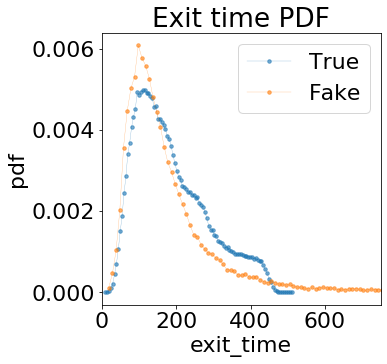

In [17]:
plt.figure(figsize=(5,5))
#exit_times = np.load('../databases/exit_time_0.50_lagrangian.npy')
#hist, bin_edges = np.histogram(exit_times,bins=100, density=True)
#print(save_pdf(bin_edges, hist, 'data/pdf_exit_time'))
hist, bin_edges = load_pdf('data/pdf_exit_time')
plt.plot(bin_edges, hist, alpha=0.6, label='True', marker='.', lw=0.3, ms=7)
hist, bin_edges = np.histogram(exit_times, bins=200, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
bin_edges = bin_edges[:-1]
plt.plot(bin_edges, hist, alpha=0.6, label='Fake', marker='.', lw=0.3, ms=7)
#plt.yscale('log')
plt.title('Exit time PDF')
plt.ylabel('pdf')
plt.xlabel('exit_time')
plt.xlim([0,750])
plt.legend()
plt.savefig(f'plots/wgangp_{run}/gan_test_exit_time_{run}_{number}.png',fmt='png',dpi=100)

# Plot Traiettorie Generate e Reali

In [87]:
db = np.load('../databases/velocities.npy')[:,:,0]

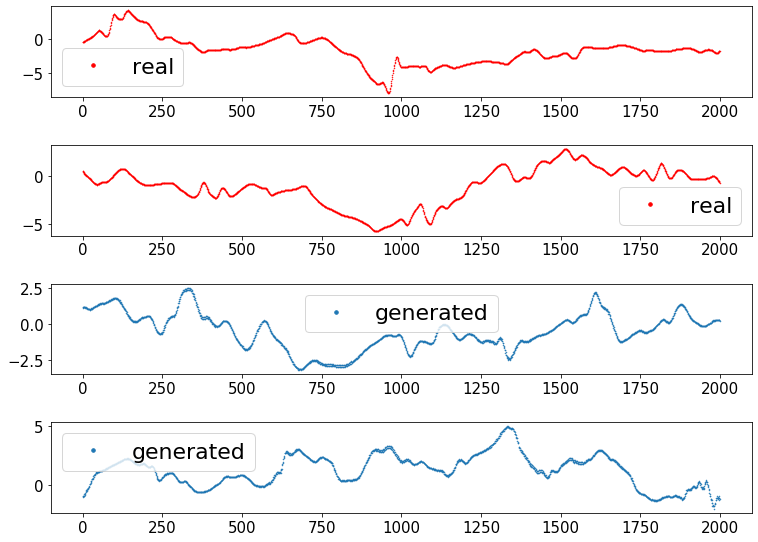

In [73]:
idx1 = np.random.randint(0, db.shape[0], 2)
idx2 = np.random.randint(0, gen.shape[0], 2)
trajs = db[idx1]
gen_trajs = gen[idx2]
plt.figure(figsize=(11, 2*len(trajs)+2*len(gen_trajs)))
plt.title('esempi di velocità vere e generate')

for i, traj in enumerate(trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1)
    plt.plot(traj, color='red', label='real', lw=0, marker='.',ms=1)
    plt.legend(markerscale=7)

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1+len(trajs))
    plt.plot(traj, label='generated', lw=0, marker='.',ms=1)
    plt.legend(markerscale=7)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_trajs_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

In [255]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 2
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

In [128]:
106996

106996

In [266]:
cc = np.argsort(np.amax(np.abs(gm.squeeze()),axis=1))[::-1]
rr = np.argsort(np.amax(np.abs(np.gradient(db[:,:,0],axis=1).squeeze()),axis=1))[::-1]

172438


(-9, 9)

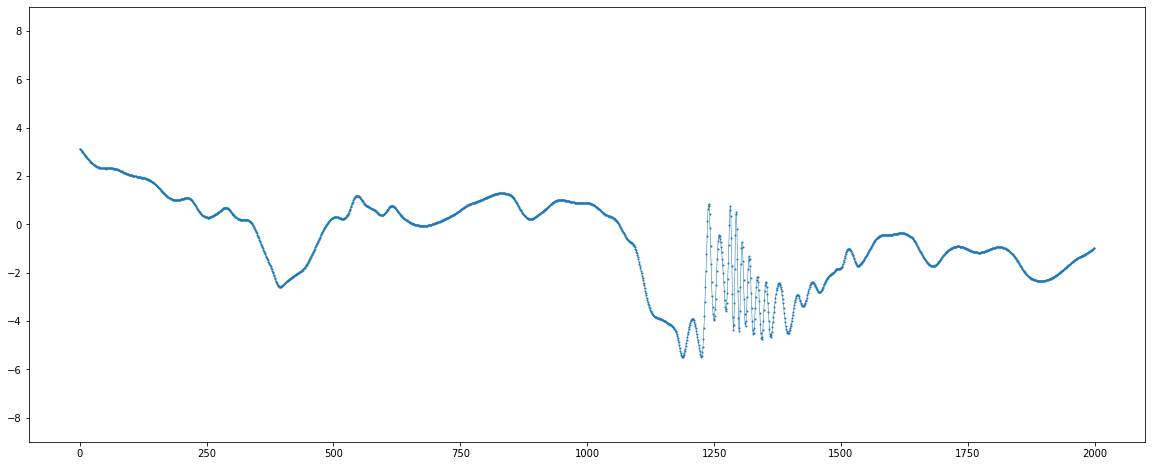

In [319]:
idx = rr[400]
print(idx)
plt.plot(db[idx,:,0])
plt.ylim([-9,9])

281069


(-9, 9)

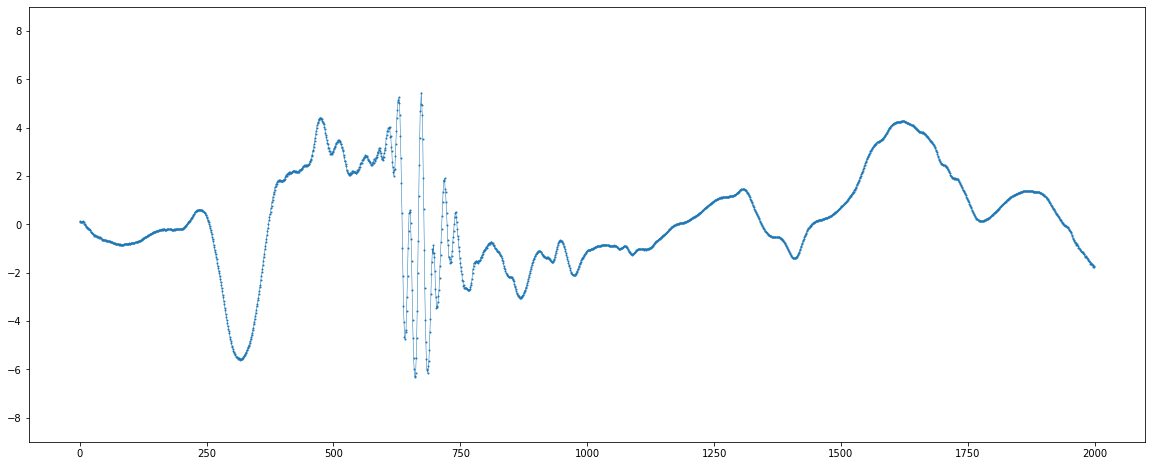

In [355]:
idx = cc[120]
print(idx)
plt.plot(gen[idx])
plt.ylim([-9,9])

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


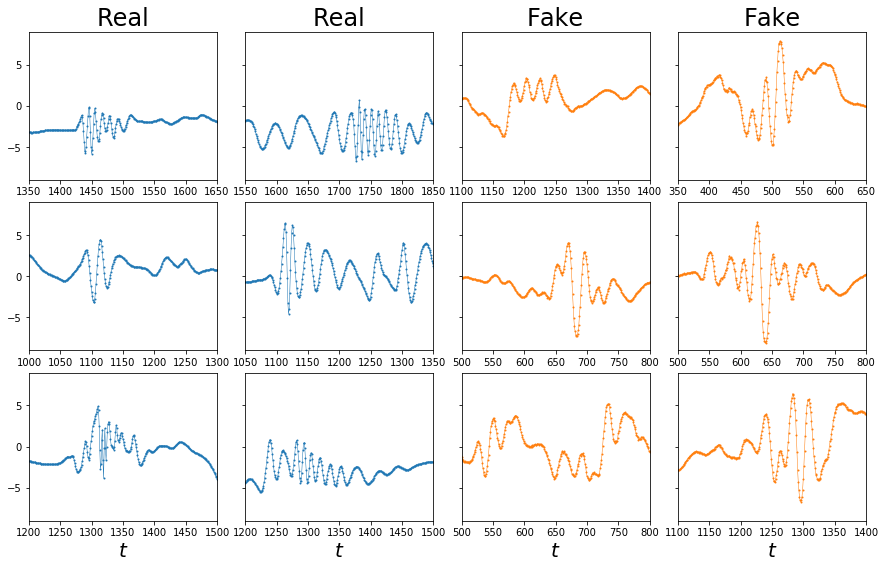

In [417]:
idx2 = [106996, 313094, 377760, 306848,315292,147315]
gen_trajs = gen[idx2]
len2 = len(gen_trajs)//2
fig, ax = plt.subplots(len(gen_trajs)//2,4, figsize=(5*len2,3*len2), gridspec_kw={'hspace': 0.15, 'wspace': 0.15}, sharey=True)
#plt.suptitle('esempi di velocità generate')

#GEN
xlims = [[1100,1400],[500,800],[500,800],[350,650],[500,800],[1100,1400]]
ylims = [[-9,9]]*len(gen_trajs)#[[-4,5],[-5,4],[-5,4],[-5,4]]

for i, j in zip(range(len2*2),[2]*len2+[3]*len2):
    ax[i%len2,j].plot(gen_trajs[i],color="C1")
    ax[i%len2,j].set_xlim(xlims[i])
    ax[i%len2,j].set_ylim(ylims[i])
    
#REAL
idx2 = [114997, 226366, 284369, 77828,210107,172438]
gen_trajs = db[idx2]
xlims = [[1350,1650],[1000,1300],[1200,1500],[1550,1850],[1050,1350],[1200,1500]]
ylims = [[-9,9]]*len(gen_trajs)#[[-4,5],[-5,4],[-5,4],[-5,4]]

for i, j in zip(range(len2*2),[0]*len2+[1]*len2):
    ax[i%len2,j].plot(db[idx2[i],:,0])
    ax[i%len2,j].set_xlim(xlims[i])
    ax[i%len2,j].set_ylim(ylims[i])

    
    
ax[0,0].set_title("Real")
ax[0,1].set_title("Real")
ax[0,2].set_title("Fake")
ax[0,3].set_title("Fake")
    
ax[-1,0].set_xlabel("$t$")
ax[-1,1].set_xlabel("$t$")
ax[-1,2].set_xlabel("$t$")
ax[-1,3].set_xlabel("$t$")



fig.tight_layout()
fig.savefig(f'lagr_gan_rare_events_run51', fmt='png', dpi=60)
#plt.savefig(f'plots/wgangp_{run}/gan_test_gen_vel_{run}_{number}.png', fmt='png', dpi=60)
fig.show()

#gen_trajs = np.gradient(gen_trajs, axis=1)
#plt.figure(figsize=(11,2*len(gen_trajs)))
#plt.suptitle('esempi di accelerationi generate')
#
#for i, traj in enumerate(gen_trajs):
#    plt.subplot(len(gen_trajs), 1, i+1)
#    plt.plot(traj, lw=0, marker='.',ms=1)
#
#plt.tight_layout()
#plt.savefig(f'plots/wgangp_{run}/gan_test_gen_acc_{run}_{number}.png', fmt='png', dpi=60)
#plt.show()

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


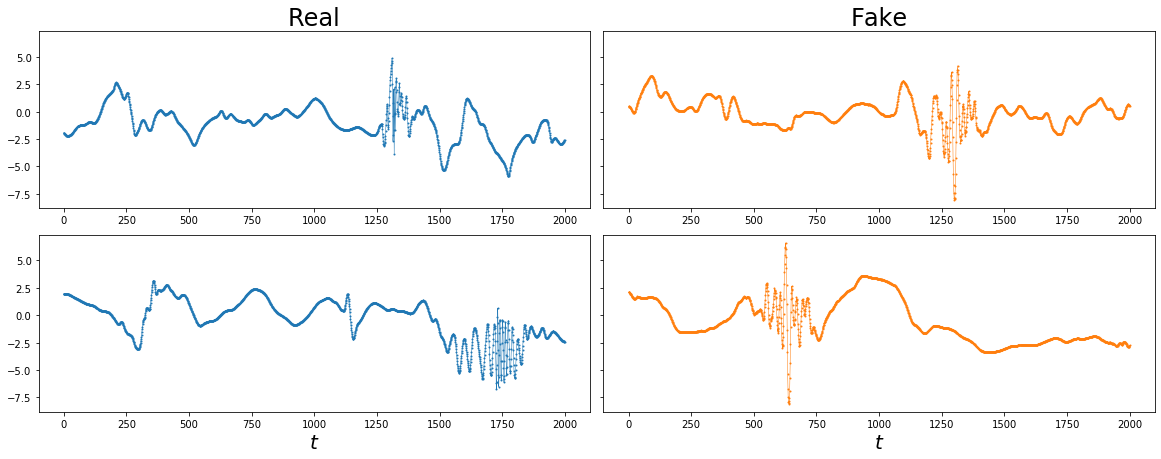

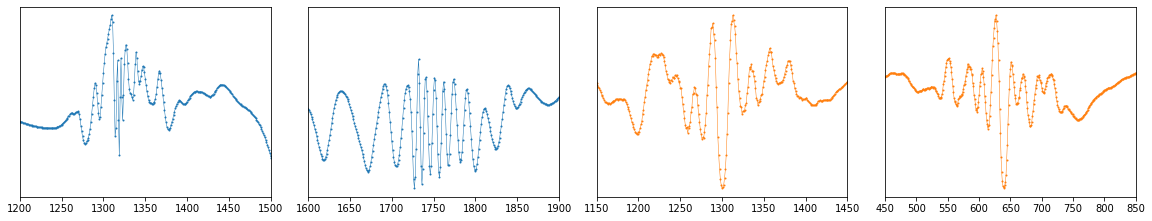

In [416]:
idx2 = [280557,315292]
gen_trajs = gen[idx2]
len2 = len(gen_trajs)//2
fig, ax = plt.subplots(len(gen_trajs),2, figsize=(20,3.5*len2*2), gridspec_kw={'hspace': 0.15, 'wspace': 0.025}, sharey=True)

#plt.suptitle('esempi di velocità generate')

for i, j in zip(range(len2*2),[1]*len2*2):
    ax[i,j].plot(gen_trajs[i],color="C1")
    
#REAL
idx2 = [284369, 77828]

for i, j in zip(range(len2*2),[0]*len2*2):
    ax[i,j].plot(db[idx2[i],:,0])
    
ax[0,0].set_title("Real")
ax[0,1].set_title("Fake")
    
ax[-1,0].set_xlabel("$t$")
ax[-1,1].set_xlabel("$t$")


fig.tight_layout()

fig.savefig(f'lagr_gan_rare_events_run51_v2', fmt='png', dpi=60)
#plt.savefig(f'plots/wgangp_{run}/gan_test_gen_vel_{run}_{number}.png', fmt='png', dpi=60)
fig.show()

fig, ax = plt.subplots(1,4*len2, figsize=(20,3.5), gridspec_kw={'hspace': 0, 'wspace': 0.15})

idx2 = [280557,315292]
gen_trajs = gen[idx2]
len2 = len(gen_trajs)//2
xlims = [[1150,1450],[450,850]]
for i in range(len2*2):
    ax[i+len2*2].plot(gen_trajs[i],color="C1")
    ax[i+len2*2].set_xlim(xlims[i])
    #ax[i+len2*2].set_xticks([])
    ax[i+len2*2].set_yticks([])
    
#REAL
idx2 = [284369, 77828]
xlims = [[1200,1500],[1600,1900]]

for i in range(len2*2):
    ax[i].plot(db[idx2[i],:,0])
    ax[i].set_xlim(xlims[i])
    #ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
fig.savefig(f'lagr_gan_rare_events_run51_v3', fmt='png', dpi=60)

    
#gen_trajs = np.gradient(gen_trajs, axis=1)
#plt.figure(figsize=(11,2*len(gen_trajs)))
#plt.suptitle('esempi di accelerationi generate')
#
#for i, traj in enumerate(gen_trajs):
#    plt.subplot(len(gen_trajs), 1, i+1)
#    plt.plot(traj, lw=0, marker='.',ms=1)
#
#plt.tight_layout()
#plt.savefig(f'plots/wgangp_{run}/gan_test_gen_acc_{run}_{number}.png', fmt='png', dpi=60)
#plt.show()

[442347 127684 185335 249866 419652 120705 269759 153655 262989 211318]


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


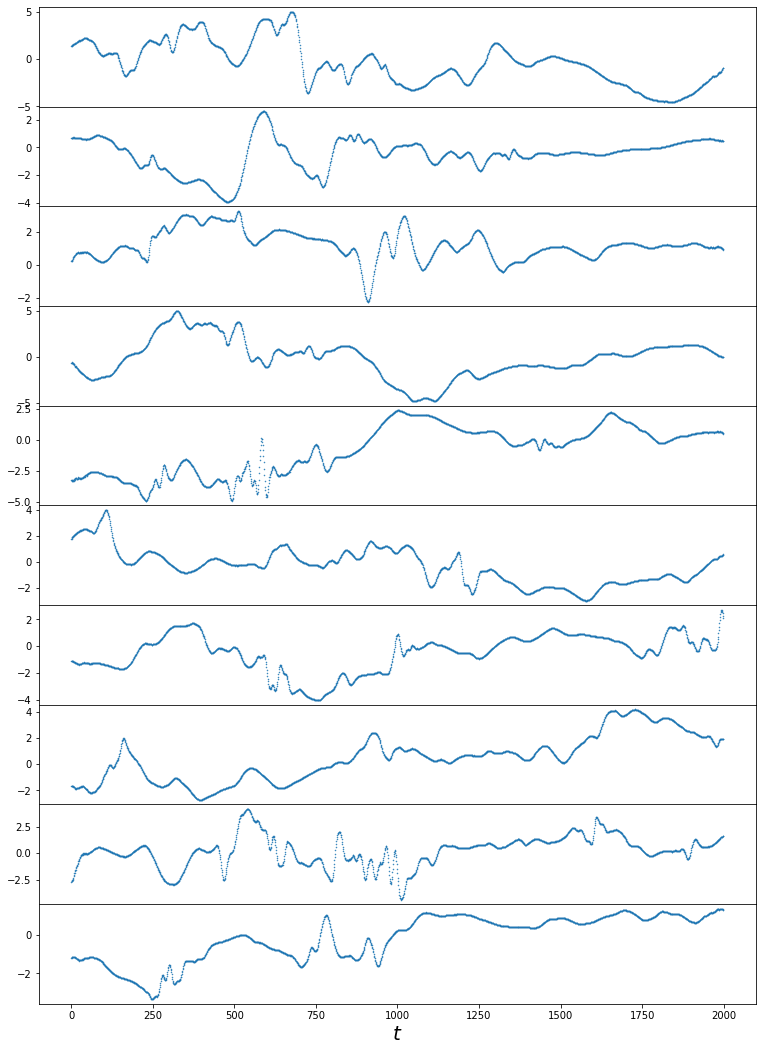

In [338]:
idx2 = [334205, 287829, 226672, 136507, 267552]# np.random.randint(0, gen.shape[0],5)
idx2 = np.random.randint(0,gen.shape[0],10)
print(idx2)
gen_trajs = gen[idx2]
fig, ax = plt.subplots(len(gen_trajs),1, figsize=(11,1.5*len(gen_trajs)), sharex=True, gridspec_kw={'hspace': 0, 'wspace': 0})
#plt.suptitle('esempi di velocità generate')

for i, traj in enumerate(gen_trajs):
    ax[i].plot(traj, lw=0, marker='.',ms=1)

#fig.text(0.1,0.5,'$v(t)$',va='center', rotation='vertical')
ax[-1].set_xlabel("$t$")
    

fig.tight_layout()
#plt.savefig(f'lagr_gan_trajs_run51', fmt='png', dpi=60)
#plt.savefig(f'plots/wgangp_{run}/gan_test_gen_vel_{run}_{number}.png', fmt='png', dpi=60)
fig.show()

#gen_trajs = np.gradient(gen_trajs, axis=1)
#plt.figure(figsize=(11,2*len(gen_trajs)))
#plt.suptitle('esempi di accelerationi generate')
#
#for i, traj in enumerate(gen_trajs):
#    plt.subplot(len(gen_trajs), 1, i+1)
#    plt.plot(traj, lw=0, marker='.',ms=1)
#
#plt.tight_layout()
#plt.savefig(f'plots/wgangp_{run}/gan_test_gen_acc_{run}_{number}.png', fmt='png', dpi=60)
#plt.show()

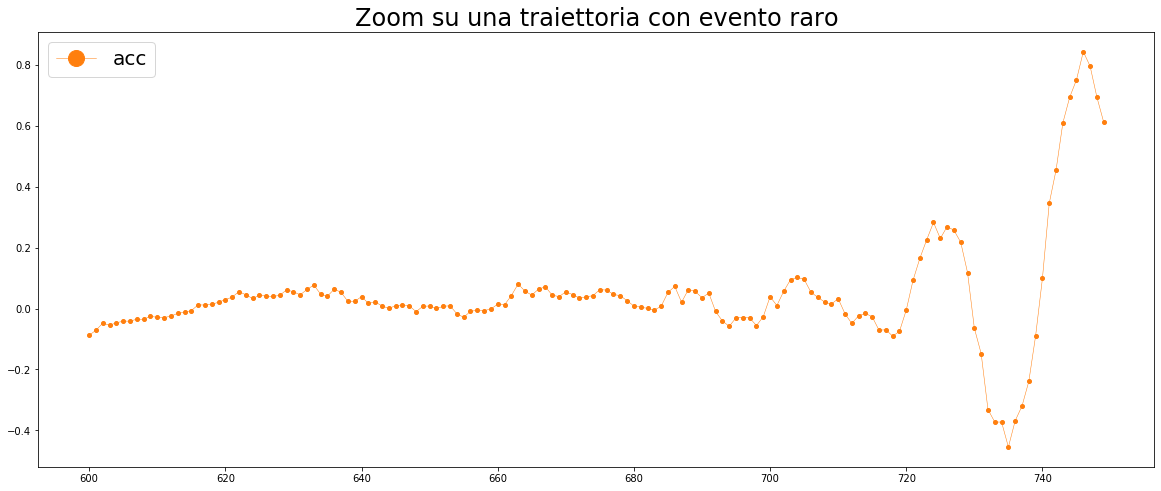

In [159]:
start=600
end=750
plt.title("Zoom su una traiettoria con evento raro")
#plt.plot(np.arange(start,end),gen[179128,start:end],label="vel")
plt.plot(np.arange(start,end),np.gradient(gen[179128,start:end],axis=0),label="acc",color="C1")
plt.legend()
plt.show()

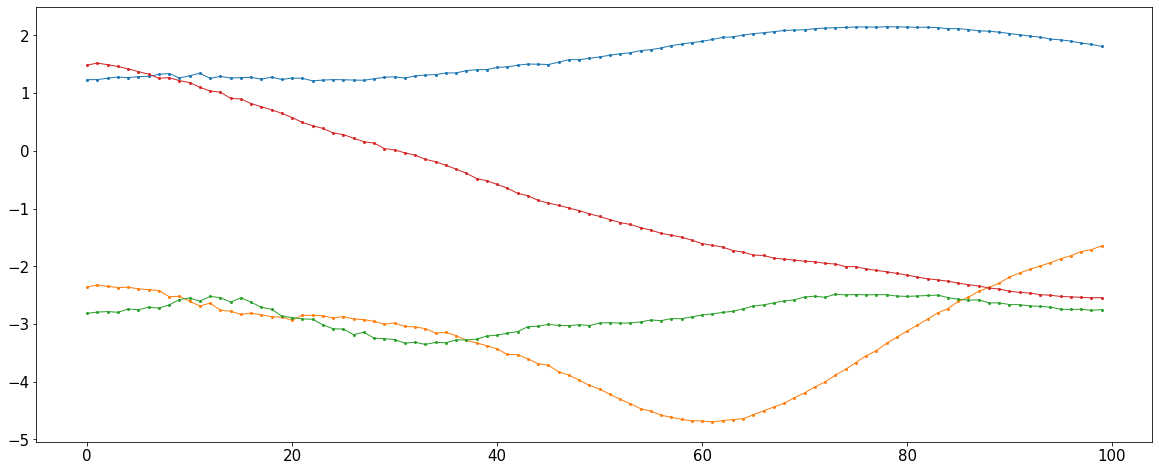

In [19]:
idx = np.random.randint(0,gen.shape[0],4)
for ii in idx:
    plt.plot(gen[ii,:100])

In [7]:

plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

# Provo a smoothare le velocità

In [59]:
#vel = gen[36350,:,0]
vel = gen[179128,:,0]
prova3 = np.zeros(shape=(2000))
prova3[0] = vel[0]
prova3[-1] = vel[-1]

prova5 = np.zeros(shape=(2000))
prova5[0] = vel[0]
prova5[1] = (vel[0] + vel[1] + vel[2])/3.
prova5[-1] = vel[-1]
prova5[-2] = (vel[-1] + vel[-2] + vel[-3])/3.

prova7 = np.zeros(shape=(2000))
prova7[0] = vel[0]
prova7[1] = (vel[0] + vel[1] + vel[2])/3.
prova7[2] = (vel[0] + vel[1] + vel[2] + vel[3] + vel[4])/5.
prova7[-1] = vel[-1]
prova7[-2] = (vel[-1] + vel[-2] + vel[-3])/3.
prova7[-3] = (vel[-1] + vel[-2] + vel[-3] + vel[-4] + vel[-5])/5.

for tt in range(1,gen.shape[1]-1):
    prova3[tt] = (vel[tt-1] + vel[tt] + vel[tt+1]) / 3.
    
for tt in range(2,gen.shape[1]-2):
    prova5[tt] = (vel[tt-2] + vel[tt-1] + vel[tt] + vel[tt+1] + vel[tt+2]) / 5.
    
for tt in range(3,gen.shape[1]-3):
    prova7[tt] = (vel[tt-3] + vel[tt-2] + vel[tt-1] + vel[tt] + vel[tt+1] + vel[tt+2] + vel[tt+3]) / 7.
    
delta = 0.4
#prova3 = prova3 - delta
#prova5 = prova5 - 2*delta
#prova7 = prova7 - 3*delta

In [68]:
def smooth(x,window_len=5,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    #if x.ndim != 1:
    #    raise ValueError, "smooth only accepts 1 dimension arrays."
#
    #if x.size < window_len:
    #    raise ValueError, "Input vector needs to be bigger than window size."
#
#
    #if window_len<3:
    #    return x
#
#
    #if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
    #    raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y[(window_len//2):-(window_len//2)]

prova7 = smooth(vel,5)

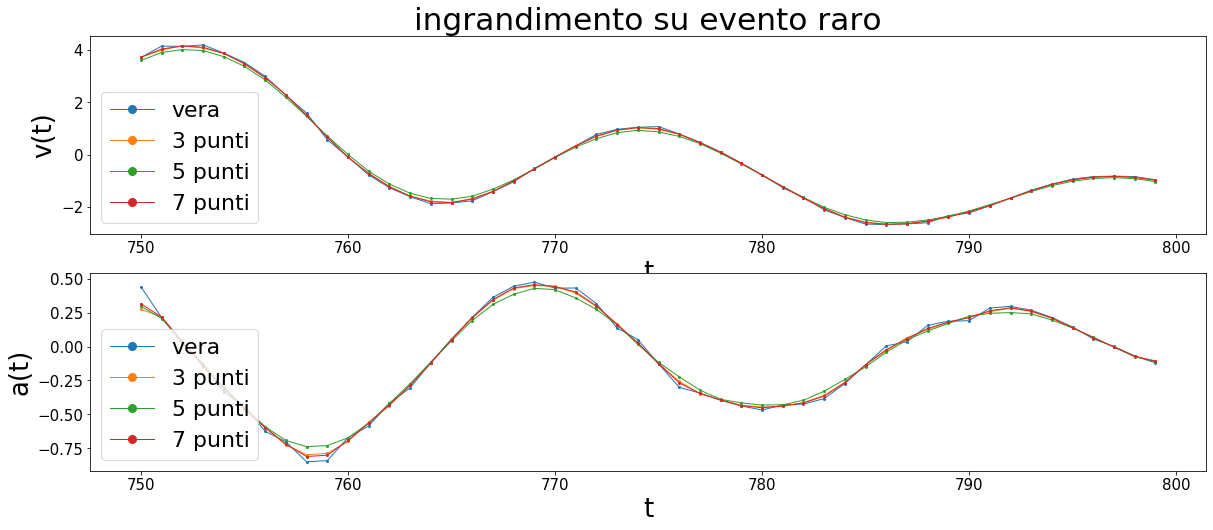

In [70]:
start=750
#start=650
end=start+50
plt.subplot(2,1,1)
#plt.title("ingrandimento su parte piatta")
plt.title("ingrandimento su evento raro")
plt.plot(np.arange(start,end),vel[start:end],label="vera")
plt.plot(np.arange(start,end),prova3[start:end],label="3 punti")
plt.plot(np.arange(start,end),prova5[start:end],label="5 punti")
plt.plot(np.arange(start,end),prova7[start:end],label="7 punti")
plt.ylabel("v(t)")
plt.xlabel("t")
plt.legend()
plt.subplot(2,1,2)
plt.plot(np.arange(start,end),np.gradient(vel[start:end]),label="vera")
plt.plot(np.arange(start,end),np.gradient(prova3[start:end]),label="3 punti")
plt.plot(np.arange(start,end),np.gradient(prova5[start:end]),label="5 punti")
plt.plot(np.arange(start,end),np.gradient(prova7[start:end]),label="7 punti")
plt.ylabel("a(t)")
plt.xlabel("t")
plt.legend()
#plt.savefig("medie_a_x_punti",fmt="png",dpi=100)
plt.show()

In [ ]:
gen5 = np.zeros(shape=50000)

for part in range(50000):
    
    if part%1000==0: print(part)
    gen5[part,0,0] = gen[part,0,0]
    gen5[part,1,0] = (gen[part,0,0] + gen[part,1,0] + gen[part,2,0])/3.
    gen5[part,-1,0] = gen[part,-1,0]
    gen5[part,-2,0] = (gen[part,-1,0] + gen[part,-2,0] + gen[part,-3,0])/3.

    for tt in range(2,gen.shape[1]-2):
        
        gen5[part,tt,0] = (gen[part,tt-2,0] + gen[part,tt-1,0] + gen[part,tt,0] + gen[part,tt+1,0] + gen[part,tt+2,0]) / 5.
        


In [100]:
gen5 = gen5[0:50000]
np.save(f"wgangp/runs/{run}/gen_trajs_{number}_5punti",gen5)

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


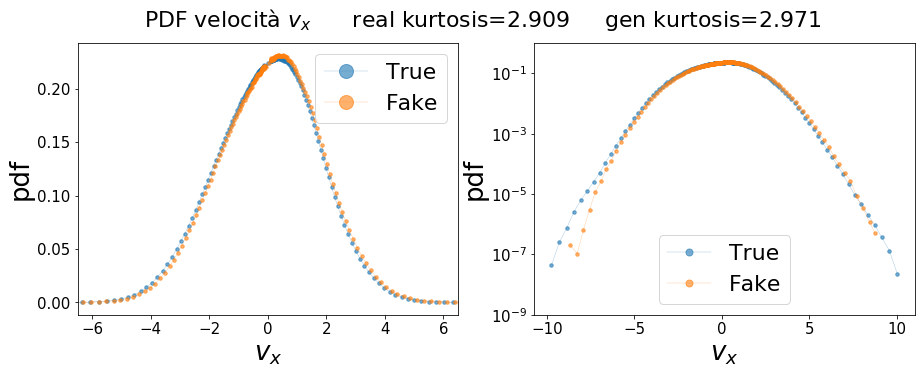

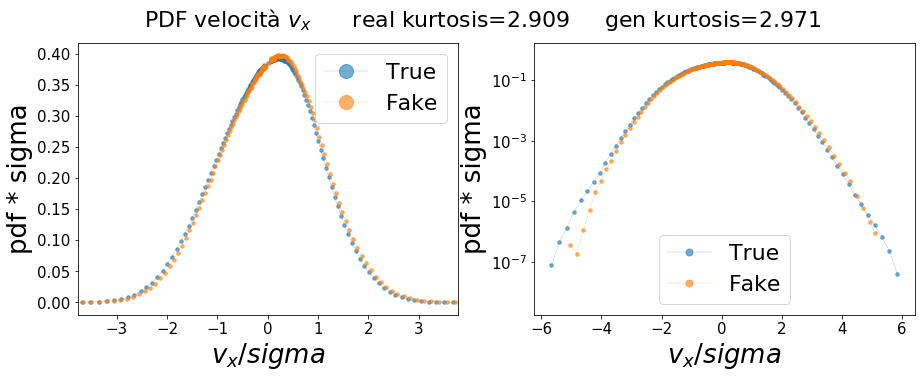

In [101]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/pdf_vx')
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
vel_std = 1.7192559430218903
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gen5.min(),gen5.max(),200,1e-1)
hist, bin_edges = np.histogram(gen5.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.set_xlabel('$v_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-6.5,6.5])
ax1.legend(markerscale=4)
ax2.set_xlabel('$v_x$')
ax2.set_yscale('log')
ax2.set_ylim([1e-9,1])
ax2.set_ylabel('pdf')
ax2.legend(markerscale=2)

ax1n.set_xlabel('$v_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-6.5/vel_std,6.5/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / sigma$')
ax2n.set_yscale('log')
ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('pdf * sigma')
ax2n.legend(markerscale=2)

#fig.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}.png', fmt='png', dpi=100)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

In [102]:
gm = np.gradient(gen5,axis=1)

1.0017092626771908
1.0051709317388708


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


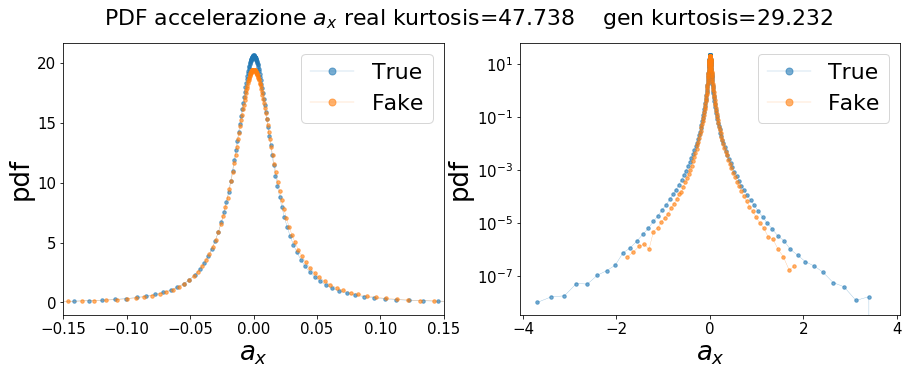

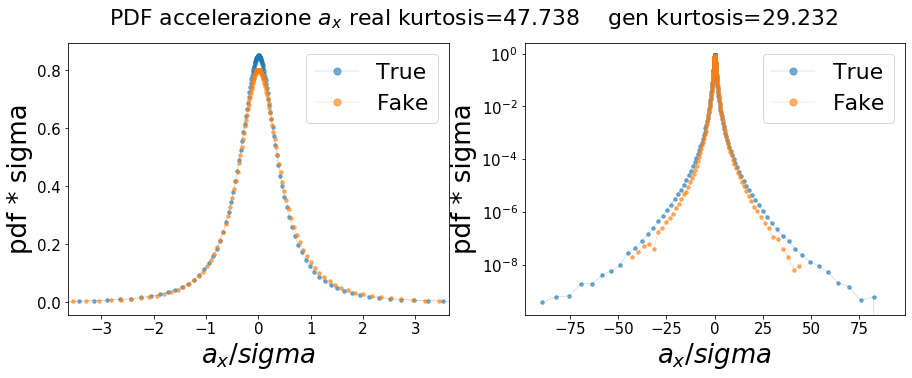

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_ax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
acc_std = 0.0412815564714219
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gm.min(),gm.max(),200,1e-3)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('$a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.15,0.15])
ax2.legend(markerscale=2)
ax2.set_xlabel('$a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.15/acc_std,0.15/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

#fig.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}.png', fmt='png', dpi=100)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

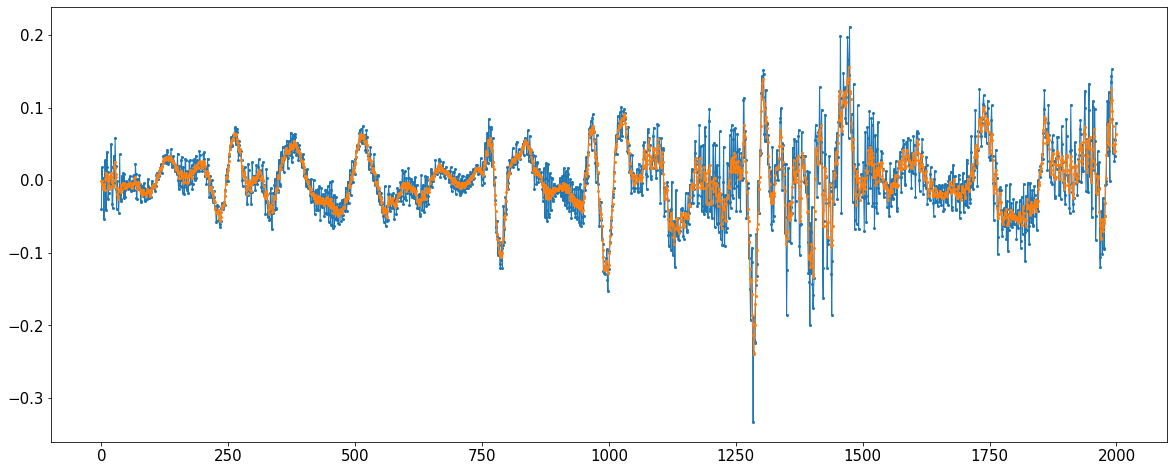

In [107]:
plt.plot(np.gradient(gen[0],axis=0))
plt.plot(np.gradient(gen5[0],axis=0))

In [ ]:
gen9 = np.zeros(shape=(500000,2000,1))

for part in range(500000):
    
    if part%1000==0: print(part)
    gen9[part,:,0] = smooth(gen[part,:,0],9,'hanning')

np.save(f"wgangp/runs/{run}/gen_trajs_{number}_media",gen9)

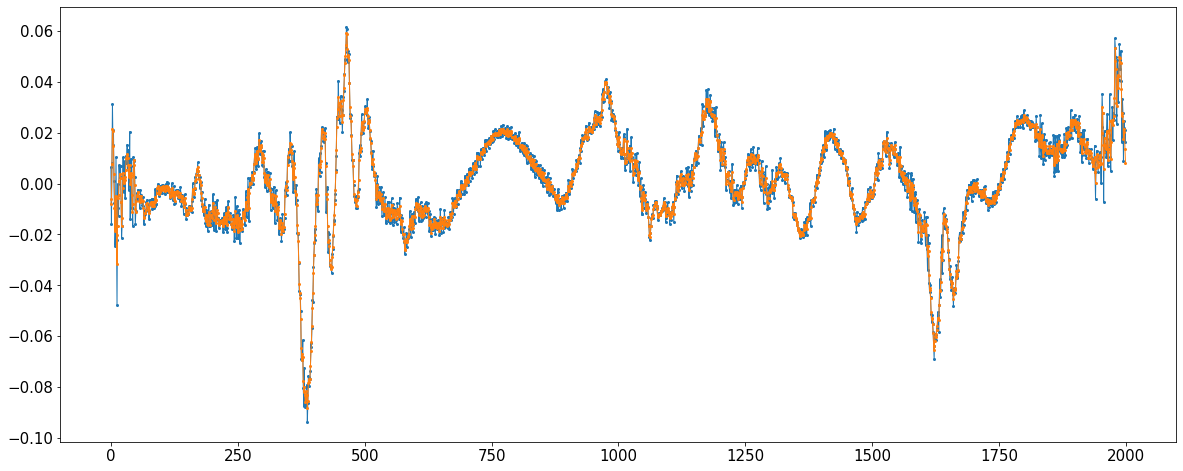

In [72]:
plt.plot(np.gradient(gen[0],axis=0))
plt.plot(np.gradient(gen9[0],axis=0))

In [18]:
gen9[0]

array([[4.20482361],
       [4.20964042],
       [4.22957096],
       ...,
       [1.87740419],
       [1.88071096],
       [1.88255815]])

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


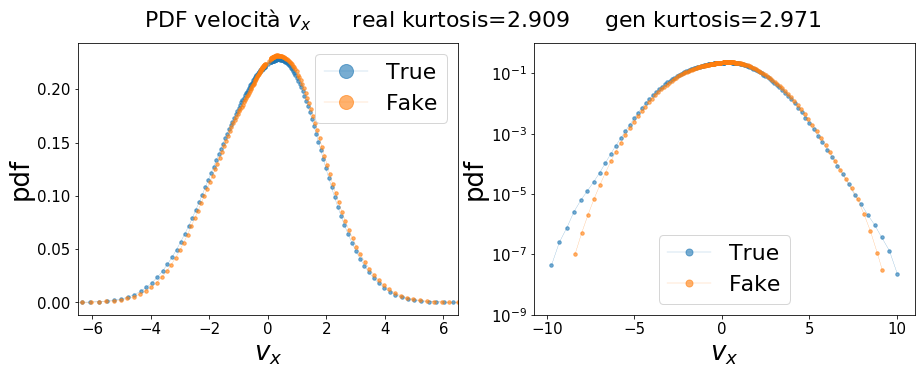

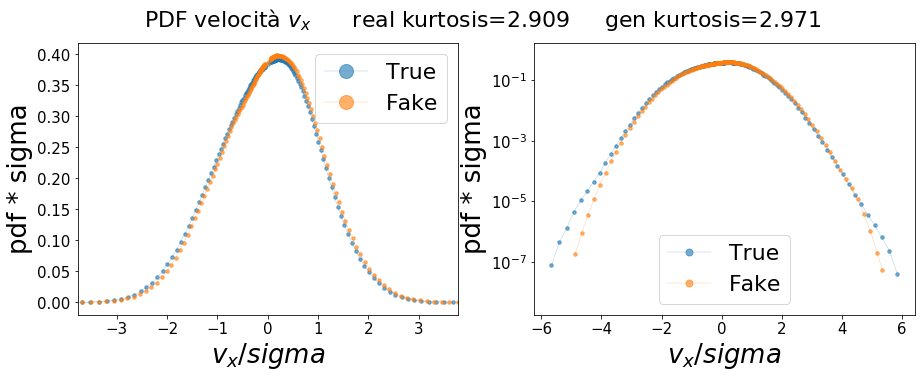

In [79]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/pdf_vx')
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
vel_std = 1.7192559430218903
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gen9.min(),gen9.max(),200,1e-1)
hist, bin_edges = np.histogram(gen9.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.set_xlabel('$v_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-6.5,6.5])
ax1.legend(markerscale=4)
ax2.set_xlabel('$v_x$')
ax2.set_yscale('log')
ax2.set_ylim([1e-9,1])
ax2.set_ylabel('pdf')
ax2.legend(markerscale=2)

ax1n.set_xlabel('$v_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-6.5/vel_std,6.5/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / sigma$')
ax2n.set_yscale('log')
ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('pdf * sigma')
ax2n.legend(markerscale=2)

#fig.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}.png', fmt='png', dpi=100)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

In [80]:
gm = np.gradient(gen9,axis=1)

1.0017092626771908
1.0029199716326498


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


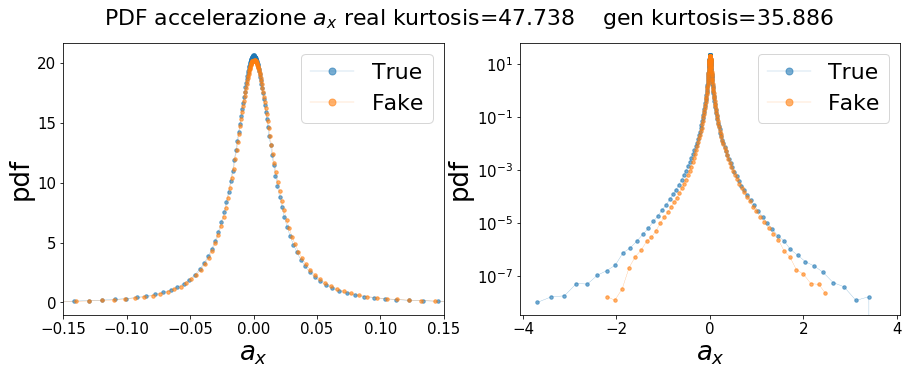

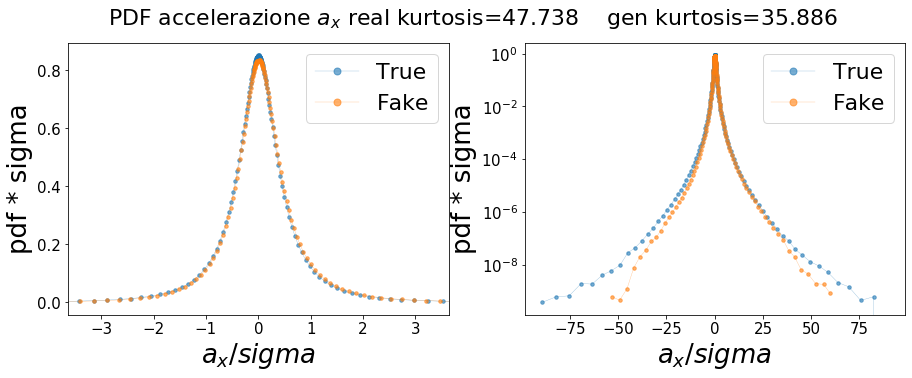

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_ax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
acc_std = 0.0412815564714219
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gm.min(),gm.max(),200,1e-3)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('$a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.15,0.15])
ax2.legend(markerscale=2)
ax2.set_xlabel('$a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.15/acc_std,0.15/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

#fig.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}.png', fmt='png', dpi=100)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

In [82]:
gmm = np.gradient(gm,axis=1)

1.0026846043833015
1.00351151686774


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


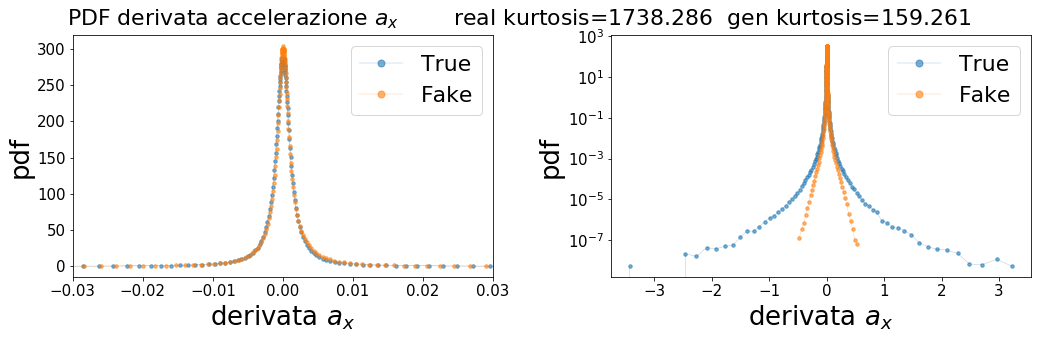

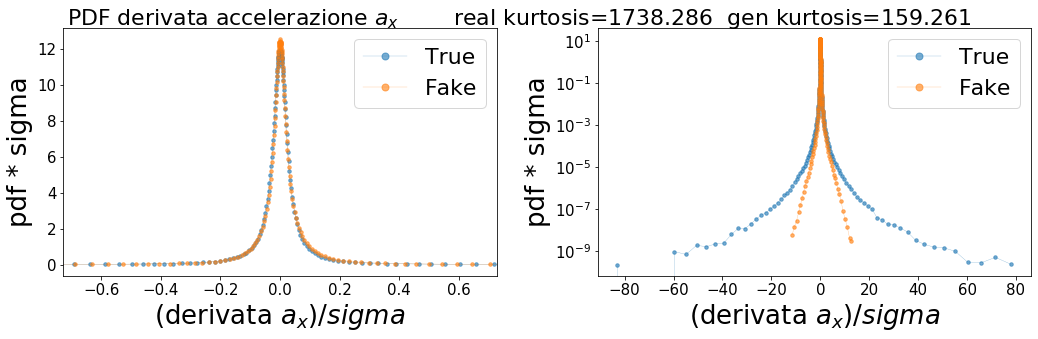

In [83]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_aax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
aacc_std = 0.007416499876515975
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gmm.min(),gmm.max(),200,1e-4)
hist, bin_edges = np.histogram(gmm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF derivata accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF derivata accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('derivata $a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.03,0.03])
ax2.legend(markerscale=2)
ax2.set_xlabel('derivata $a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('(derivata $a_x )/ sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.03/acc_std,0.03/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('(derivata $a_x )/ sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

fig.tight_layout()
fign.tight_layout()
fig.savefig(f'plots/wgangp_{run}/gan_test_d2_{run}_{number}.png', fmt='png', dpi=60)
fign.savefig(f'plots/wgangp_{run}/gan_test_d2_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

[459730 334606 314846 456617 197500 467727  50153 152838 346872 431810]


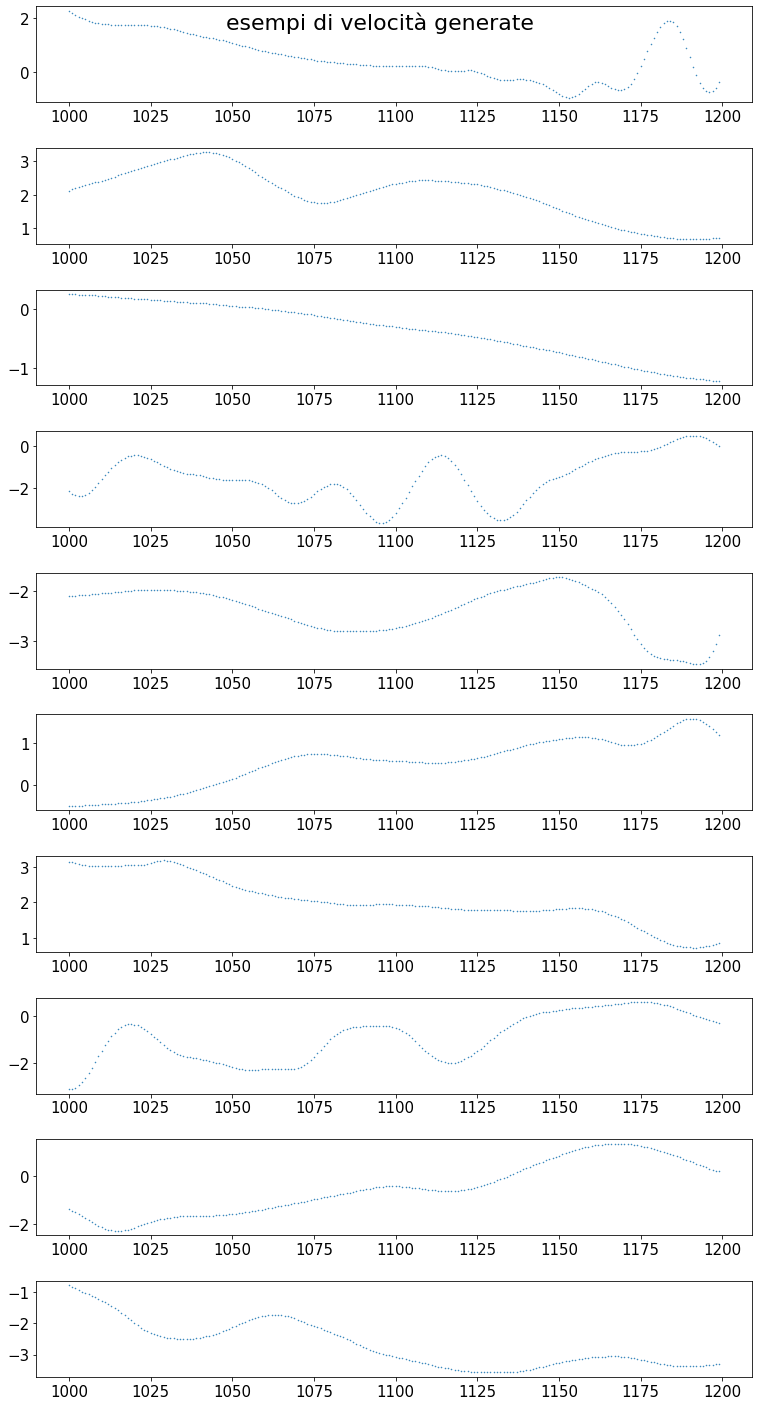

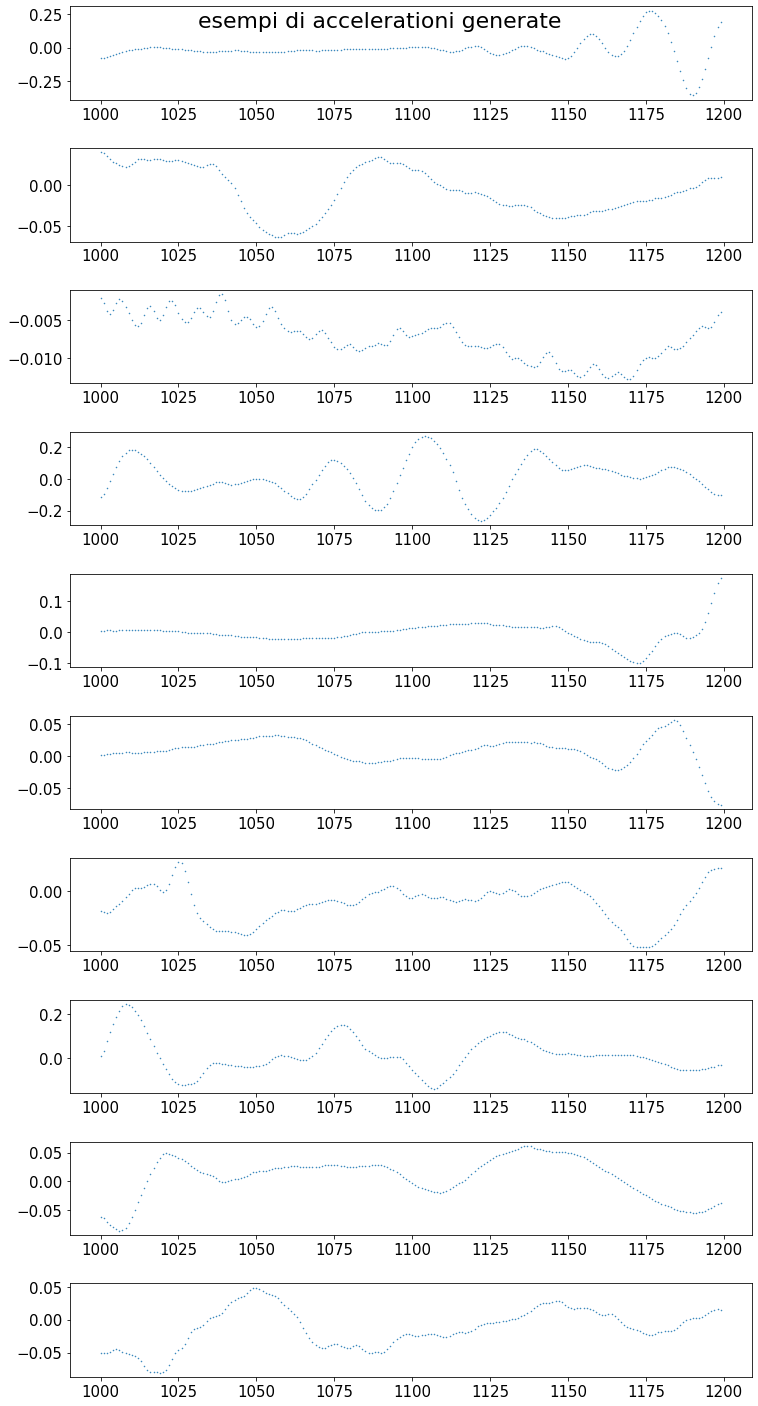

In [106]:
idx2 = np.random.randint(0, gen9.shape[0],10)
print(idx2)
start=1000
end=start+200
axis = np.arange(start,end)
gen_trajs = gen9[idx2,start:end]
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di velocità generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(axis,traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_gen_vel_{run}_{number}_media.png', fmt='png', dpi=100)
plt.show()

gen_trajs = np.gradient(gen_trajs, axis=1)
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di accelerationi generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(axis,traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_gen_acc_{run}_{number}_media.png', fmt='png', dpi=100)
plt.show()

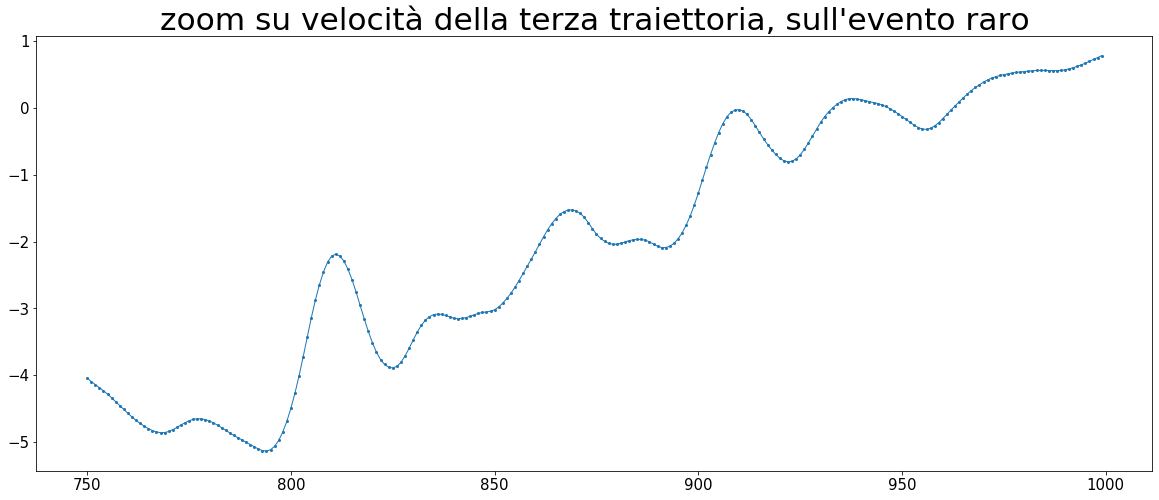

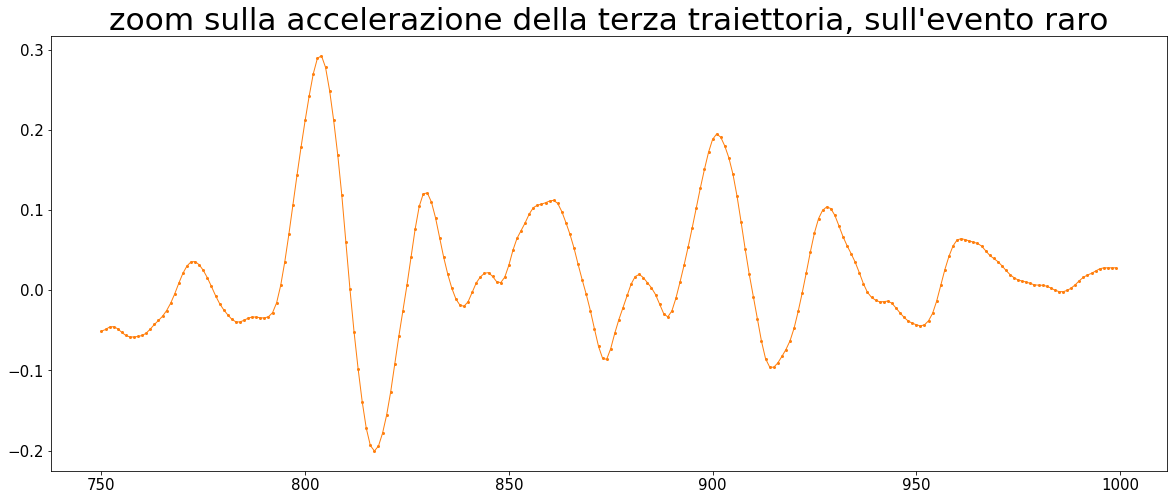

In [100]:
start=750
end=1000
plt.title("zoom su velocità della terza traiettoria, sull'evento raro")
plt.plot(np.arange(start,end),gen9[458300,start:end])
plt.show()
plt.title("zoom sulla accelerazione della terza traiettoria, sull'evento raro")
plt.plot(np.arange(start,end),np.gradient(gen9[458300,start:end],axis=0),color="C1")
plt.show()

# Matrici covarianza secondo e quarto ordine

In [12]:
db = np.load("../databases/velocities.npy")[:,:,0:1]

In [21]:
c = cov2(db)
cc = cov4(db)
#np.save("data/cij",c)
#np.save("data/c2ij",cc)

In [54]:
cn = cov2(gen)
ccn = cov4(gen)

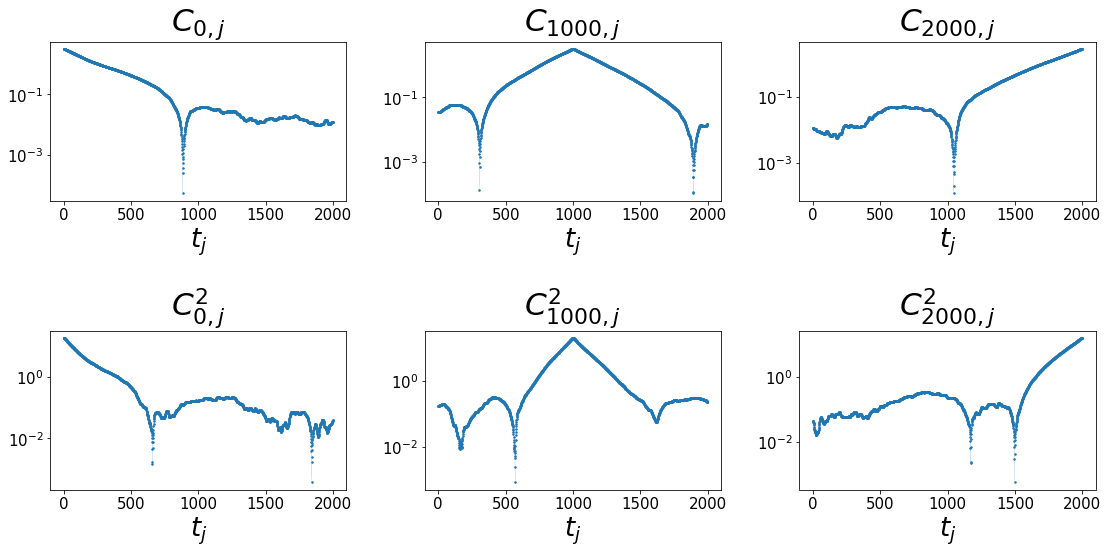

In [58]:
real_cov = np.abs(c)
plt.subplot(2,3,1)
plt.yscale("log")
plt.title("$C_{0,j}$")
plt.xlabel("$t_j$")
plt.plot(real_cov[:,0])
plt.subplot(2,3,2)
plt.yscale("log")
plt.title("$C_{1000,j}$")
plt.plot(real_cov[:,1000])
plt.xlabel("$t_j$")
plt.subplot(2,3,3)
plt.yscale("log")
plt.title("$C_{2000,j}$")
plt.plot(real_cov[:,1999])
plt.xlabel("$t_j$")
real_cov = np.abs(cc)
plt.subplot(2,3,4)
plt.yscale("log")
plt.title("$C^2_{0,j}$")
plt.xlabel("$t_j$")
plt.plot(real_cov[:,0])
plt.subplot(2,3,5)
plt.yscale("log")
plt.title("$C^2_{1000,j}$")
plt.plot(real_cov[:,1000])
plt.xlabel("$t_j$")
plt.subplot(2,3,6)
plt.yscale("log")
plt.title("$C^2_{2000,j}$")
plt.plot(real_cov[:,1999])
plt.xlabel("$t_j$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("corr_matrix",fmt="png",dpi=60)
plt.show()

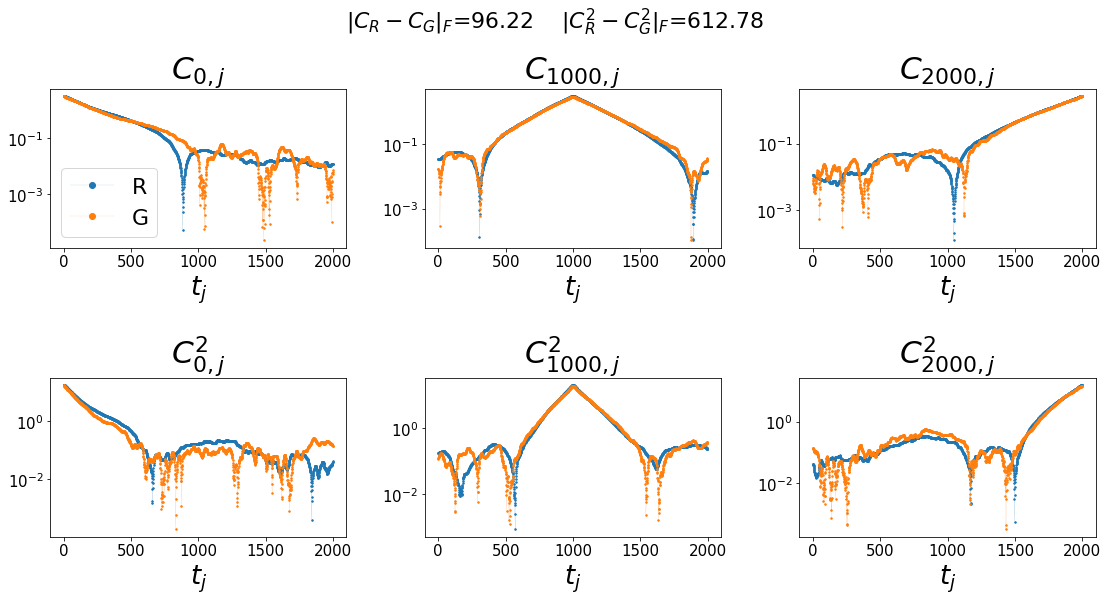

In [60]:
real_cov = np.abs(c)
gen_cov = np.abs(cn)
plt.subplot(2,3,1)
plt.yscale("log")
plt.suptitle("$|C_R-C_G|_F$=%.2f    $|C^2_R-C^2_G|_F$=%.2f"%(np.linalg.norm(c-cn),np.linalg.norm(cc-ccn)))
plt.title("$C_{0,j}$")
plt.xlabel("$t_j$")
plt.plot(real_cov[:,0],label="R")
plt.plot(gen_cov[:,0],label="G")
plt.legend()
plt.subplot(2,3,2)
plt.yscale("log")
plt.title("$C_{1000,j}$")
plt.plot(real_cov[:,1000],label="R")
plt.plot(gen_cov[:,1000],label="G")
plt.xlabel("$t_j$")
plt.subplot(2,3,3)
plt.yscale("log")
plt.title("$C_{2000,j}$")
plt.plot(real_cov[:,1999],label="R")
plt.plot(gen_cov[:,1999],label="G")
plt.xlabel("$t_j$")
real_cov = np.abs(cc)
gen_cov = np.abs(ccn)
plt.subplot(2,3,4)
plt.yscale("log")
plt.title("$C^2_{0,j}$")
plt.xlabel("$t_j$")
plt.plot(real_cov[:,0],label="R")
plt.plot(gen_cov[:,0],label="G")
plt.subplot(2,3,5)
plt.yscale("log")
plt.title("$C^2_{1000,j}$")
plt.plot(real_cov[:,1000],label="R")
plt.plot(gen_cov[:,1000],label="G")
plt.xlabel("$t_j$")
plt.subplot(2,3,6)
plt.yscale("log")
plt.title("$C^2_{2000,j}$")
plt.plot(real_cov[:,1999],label="R")
plt.plot(gen_cov[:,1999],label="G")
plt.xlabel("$t_j$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("corr_matrix_comp",fmt="png",dpi=60)
plt.show()

In [228]:
print("C  ",np.linalg.norm(c-cn))
print("C2  ",np.linalg.norm(cc-ccn))

C   204.6670961448938
C2   865.3144299651269


In [2]:
def cov4(db,npart=None):
    if npart == None:
        dbn = db
    else:
        idx = np.random.randint(0,db.shape[0],npart)
        dbn = db[idx]
    dbm = dbn - np.mean(dbn, axis=0)
    dbm=np.square(dbm[:,:,0])
    #print(dbm.shape[0])
    dbm=dbm - np.mean(dbm, axis=0)
    cc = np.dot(dbm.T,dbm) / (dbm.shape[0])
    return cc

def cov2(db,npart=None):
    if npart == None:
        dbn = db
    else:
        idx = np.random.randint(0,db.shape[0],npart)
        dbn = db[idx]
    dbm = dbn - np.sum(dbn, axis=0, keepdims=True)/(dbn.shape[0])
    dbm=dbm[:,:,0]
    #print(dbm.shape[0])
    cc = np.dot(dbm.T,dbm) / (dbm.shape[0])
    return cc

In [67]:
#db = np.load('../databases/velocities.npy')[:,:,0:1]
M = 10.273698864467972
m = -9.970374739869616
semidisp = (M-m)/2.
media = (M+m)/2.
#db = (db - media)/semidisp
#gen = (gen - media)/semidisp

In [103]:
bs = 500
idx = np.random.randint(0,gen.shape[0],bs)
cg = cov4(gen[idx])
print("mean cov4 g = ",np.mean(cg))
idx = np.random.randint(0,db.shape[0],bs)
cr = cov4(db[idx])
print("mean cov4 r = ",np.mean(cr))

mean cov4 g =  0.00016723678
mean cov4 r =  0.00018536380687594125


In [104]:
print(np.linalg.norm(cr-cg))

0.2664980591561458


# funzione che prende in input run e number e genera N velocità

In [69]:
def gen_traj(npart, run, it, noise=None):
    path = f'/scratch/scarpolini/lagrangian/wgangp/runs/{run}/{it}_gen.h5'
    gen = load_model(path)
    if noise.all==None: 
        trajs = gen.predict(np.random.normal(0, 1, size=(npart, 100)))
        M = 10.273698864467972
        m = -9.970374739869616
        semidisp = (M-m)/2.
        media = (M+m)/2.
        trajs = trajs*semidisp + media
    else: 
        trajs = gen.predict(noise)
        M = 10.273698864467972
        m = -9.970374739869616
        semidisp = (M-m)/2.
        media = (M+m)/2.
        trajs = trajs*semidisp + media
    return trajs

In [6]:
generator = load_model(f'/scratch/scarpolini/lagrangian/wgangp/runs/{51}/{1750}_gen.h5')

W0822 17:50:22.533349 47981052730880 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0822 17:50:22.536958 47981052730880 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0822 17:50:22.602623 47981052730880 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (fr

In [ ]:
print("[", end="")
for i in noise[0]:
    print(i, end=",\n")
print("]", end="")

In [67]:
noise[1]

array([ 4.86275837e-01, -6.86202562e-01,  3.01375531e-01, -4.44868101e-01,
        2.62513884e-01, -1.23643022e+00, -5.63766340e-01, -2.89901535e-01,
        7.05589063e-01,  9.84258675e-01,  2.07066243e-01,  1.54812664e+00,
        1.36827717e+00, -1.56667835e+00,  7.51477066e-01,  7.76844932e-01,
        1.09080257e+00,  1.05450609e+00,  3.03772795e+00, -4.85478536e-01,
        1.61937376e+00, -5.48189390e-01,  9.51187935e-01, -2.45763062e-01,
        2.54466936e-01,  1.75444752e+00, -6.17753037e-02,  1.04961765e+00,
       -4.12671501e-01,  2.78068231e-01,  6.37049817e-01,  1.24369959e-01,
       -2.92546044e-03,  1.06430032e+00,  4.38838470e-01, -3.17704258e-01,
        4.06742443e-01, -1.07189943e+00,  6.39853255e-01, -1.04476772e+00,
        6.20787468e-01,  1.97615346e+00, -5.69939507e-01,  1.73181916e-01,
        3.59237186e-01,  4.90051744e-01, -6.60878180e-01,  2.35708567e+00,
        7.79033179e-01,  5.60827961e-01, -1.74881193e-01,  1.44656203e-01,
        8.68464182e-01,  

(-9, 9)

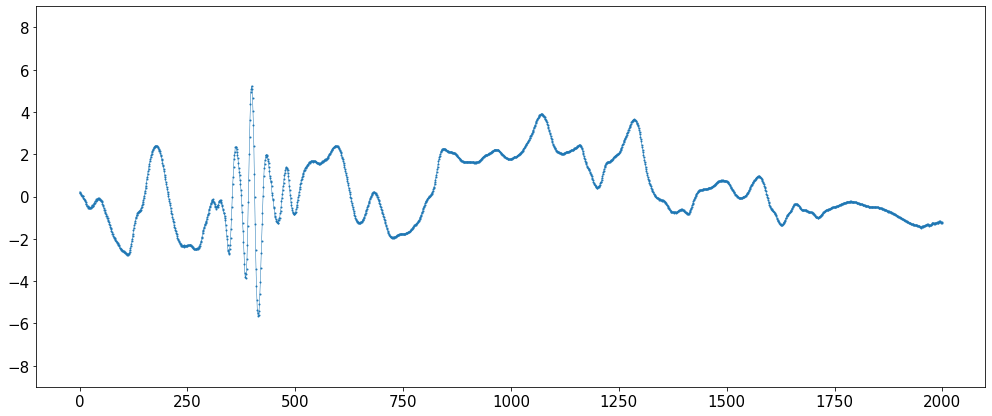

In [73]:
#noise = np.random.normal(0, 1, size=(10, 100))

M = 10.273698864467972
m = -9.970374739869616
semidisp = (M-m)/2.
media = (M+m)/2.
plt.plot(generator.predict(noise)[1:2].squeeze().T*semidisp + media)
plt.ylim(-9,9)

# creo sequenza di generatori da caricare

In [419]:
jump = 250

numbers = np.arange(0,10000+jump, jump)
runs = [49]*len(numbers)
nn = numbers
rr = runs

numbers = np.arange(jump,2500+jump, jump)
runs = [50]*len(numbers)
nn = np.r_[nn, numbers]
rr = rr + runs

numbers = np.arange(jump,1750+jump, jump)
runs = [51]*len(numbers)
nn = np.r_[nn, numbers]
rr = rr + runs

for ii in range(len(rr)):
    print(rr[ii], nn[ii])

49 0
49 250
49 500
49 750
49 1000
49 1250
49 1500
49 1750
49 2000
49 2250
49 2500
49 2750
49 3000
49 3250
49 3500
49 3750
49 4000
49 4250
49 4500
49 4750
49 5000
49 5250
49 5500
49 5750
49 6000
49 6250
49 6500
49 6750
49 7000
49 7250
49 7500
49 7750
49 8000
49 8250
49 8500
49 8750
49 9000
49 9250
49 9500
49 9750
49 10000
50 250
50 500
50 750
50 1000
50 1250
50 1500
50 1750
50 2000
50 2250
50 2500
51 250
51 500
51 750
51 1000
51 1250
51 1500
51 1750


In [544]:
noise[3:4,:].shape

(1, 100)

In [70]:
nn = [0, 250, 1750]
rr = [49,49,51]

for ii in range(len(nn)):
    print(rr[ii], nn[ii])
    if ii>0: trajs = np.r_[trajs, gen_traj(10,rr[ii],nn[ii], noise=noise[1:2,:])]
    else: trajs = gen_traj(1,rr[ii],nn[ii], noise=noise[1:2,:])

49 0


W0822 17:58:47.563801 47981052730880 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 250


W0822 17:58:48.672504 47981052730880 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


51 1750


W0822 17:58:49.722111 47981052730880 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


# creo sequenza di plot

In [74]:
plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 2
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

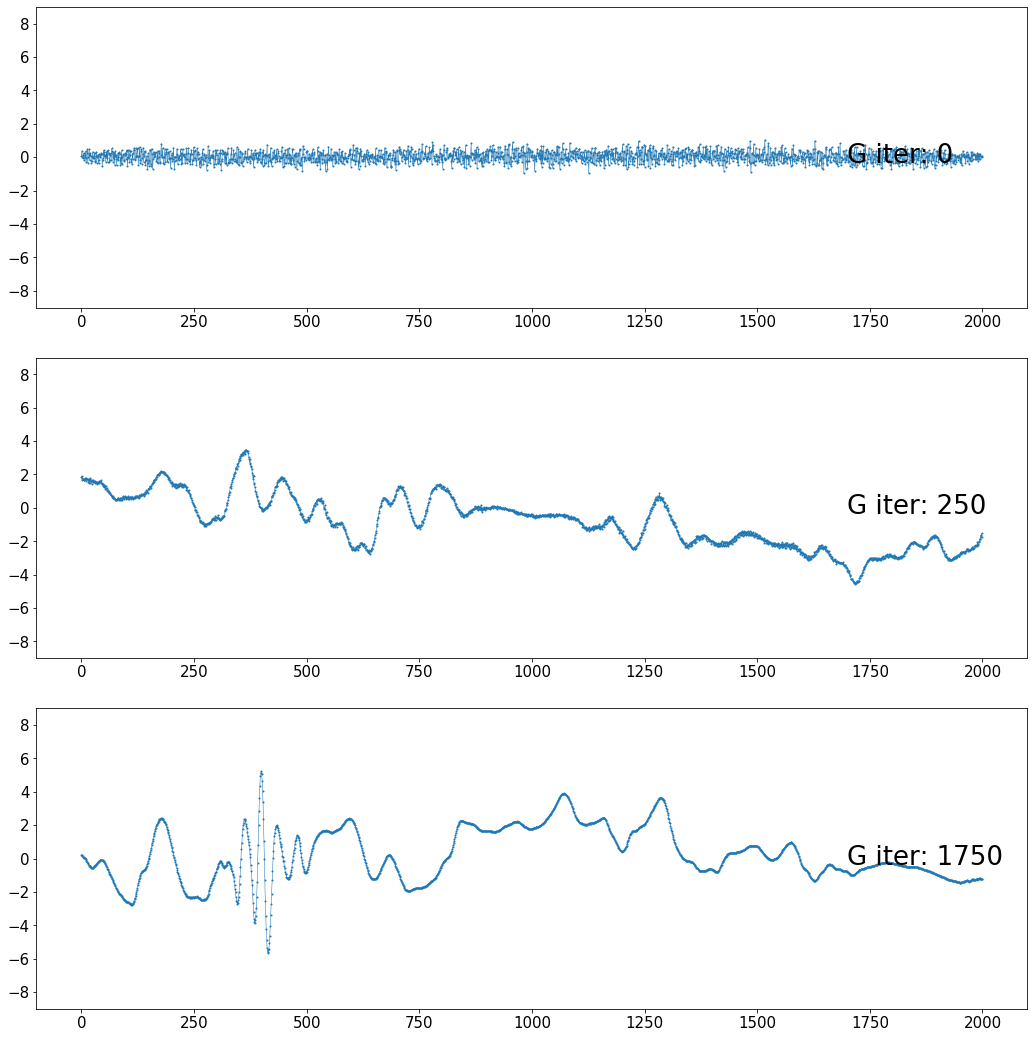

In [75]:
for jj, ii in enumerate(np.arange(0,trajs.shape[0])):
    plt.subplot(trajs.shape[0],1,jj+1)
    plt.ylim([-9, 9])
    plt.plot(trajs[ii])
    plt.text(1700,-0.35,'G iter: '+str(nn[ii]))
plt.tight_layout()
plt.show()

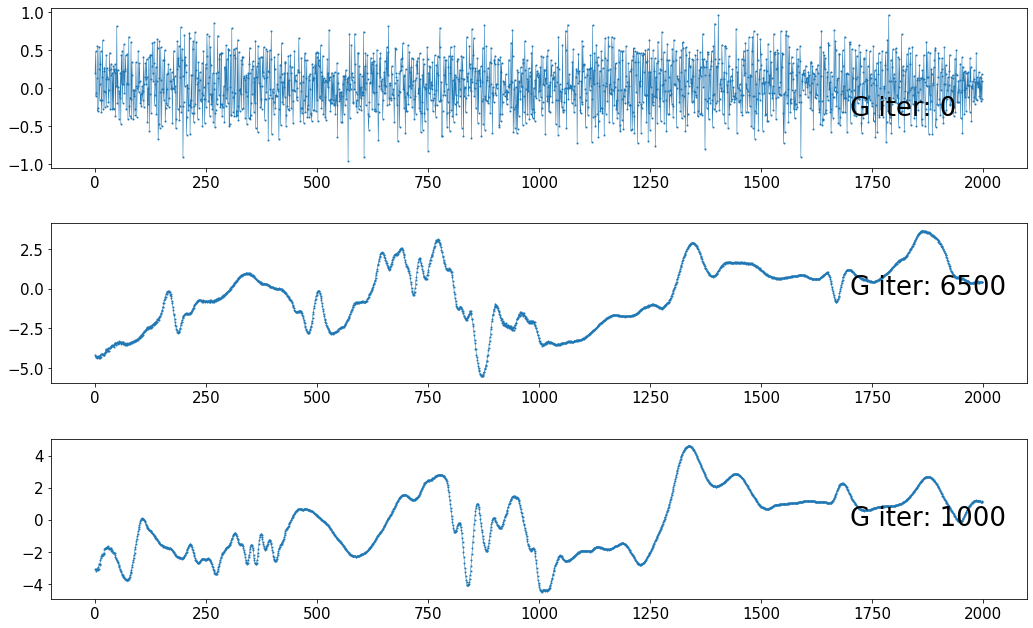

In [551]:
plots = 5
jumpp = (trajs.shape[0]+plots)//plots
for jj, ii in enumerate(np.arange(0,trajs.shape[0],jumpp)):
    plt.subplot(plots,1,jj+1)
    #plt.ylim([-0.4, 0.4])
    plt.plot(trajs[ii])
    plt.text(1700,-0.35,'G iter: '+str(nn[ii]))
plt.tight_layout()
plt.show()

In [76]:
#np.save('gen_trajs_run51', trajs)

# creo gif

timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 0


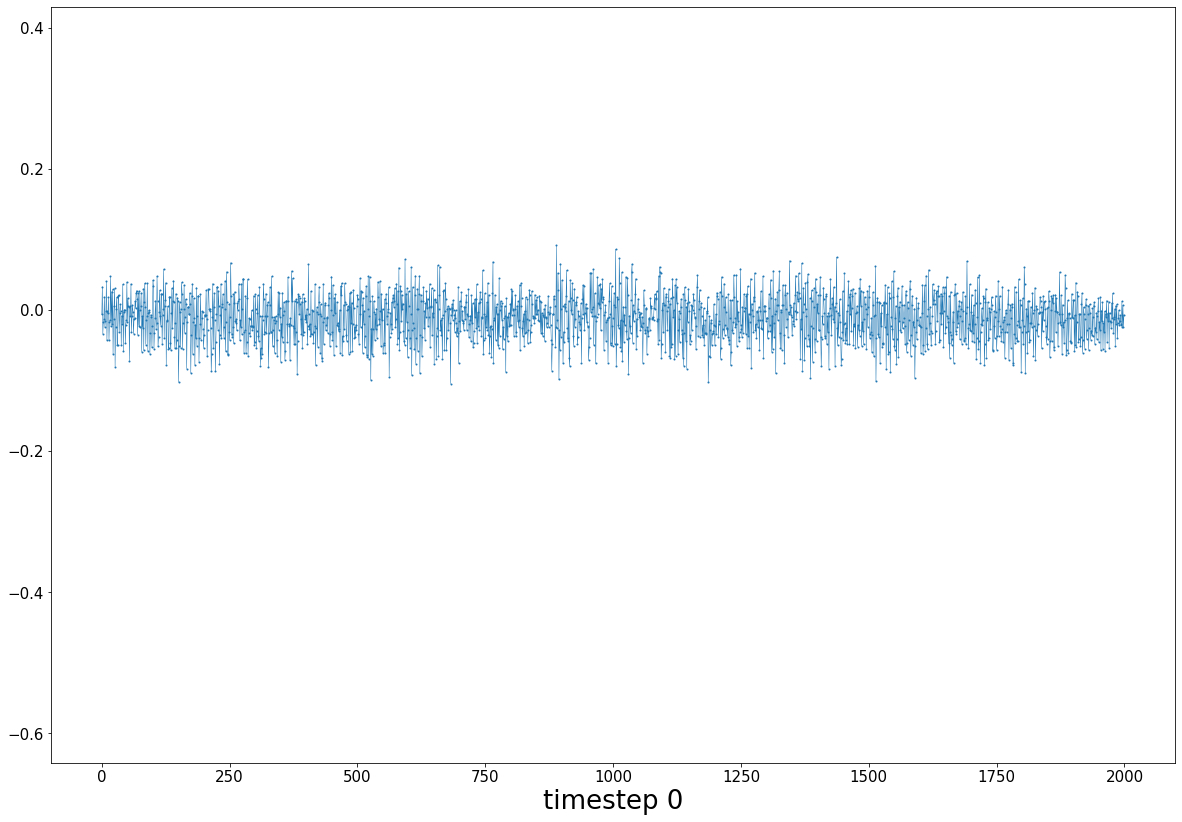

In [151]:
from matplotlib.animation import FuncAnimation

def update(ii):
    label = 'timestep {0}'.format(ii)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(trajs[ii])
    ax.set_xlabel(label)
    return line, ax

fig, ax = plt.subplots()
fig.set_tight_layout(True)

line, = ax.plot(trajs[-1])
line.set_ydata(trajs[0])

anim = FuncAnimation(fig, update, frames=np.arange(0, trajs.shape[0]), interval=600)
anim.save('line.gif', dpi=60, writer='imagemagick')

In [106]:
def std_hist(bins, hist, linear=False):
    """

    Standardizes a pdf or an histogram.

    Parameters
    ----------
    bins : array_like
        Bins median point.
    hist : array_like
        Counts for each bin. Can be normalized.

    Returns
    -------
    bins : array_like
        Bins median point, standardized.
    hist : array_like
        Probability density function for each bin, standardized.

    Notes
    -----
    Works only with linearly spaced bins.
    
    """
    binw = bins[1]-bins[0]
    norm = np.sum(hist)*binw
    hist = hist / norm
    mean = np.sum(hist*bins*binw)
    std = np.sqrt(np.sum(binw*hist*(bins-mean)**2.))
    hist = hist * std
    bins = (bins - mean) / std
    return bins, hist

Text(0.5, 0, '$(x-\\bar{x})/\\sigma$')

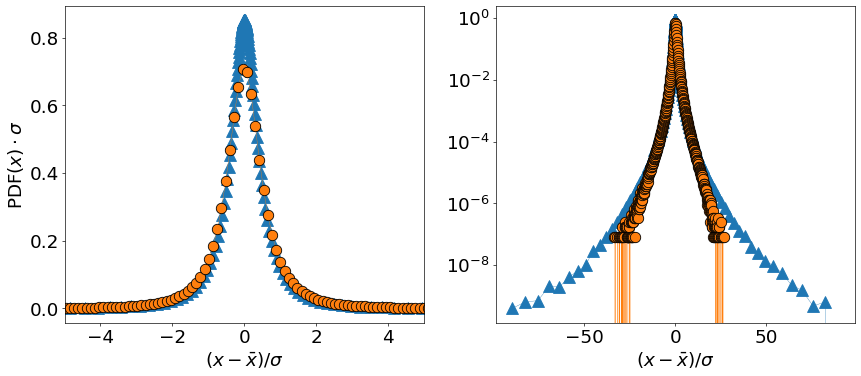

In [109]:
op_gen = {'marker':'.','lw':0.4,'ms':25,'markeredgewidth':1 , 'markeredgecolor':"black"}
op_real = {'marker':'^','lw':0.4,'ms':14}

acc_std = 0.0412815564714219
hist, bin_edges = load_pdf('data/pdf_ax')
pdf = np.loadtxt(f"data/"+wgan_type+f"/pdf1_{gen.shape[0]}_part_gen_{run}_{number}.npy")
plt.figure(figsize=(17,7),dpi=60)
plt.subplot(121)
plt.plot(bin_edges/acc_std, hist*acc_std, **op_real)
plt.plot(*std_hist(*pdf.T), **op_gen)
plt.xlim([-5,5])
plt.xlabel('$(x-\\bar{x})/\\sigma$')
plt.ylabel('PDF$(x)\\cdot\\sigma$')
plt.subplot(122)
plt.plot(bin_edges/acc_std, hist*acc_std, **op_real)
plt.plot(*std_hist(*pdf.T), **op_gen)
plt.yscale('log')
plt.xlabel('$(x-\\bar{x})/\\sigma$')